# Uncovering Insights from a Global Technology Sales Dataset

## Data Understanding

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.preprocessing import StandardScaler


In [4]:
data = pd.read_csv(r"global_tech_sales.csv")
data.head()

,OrderID,OrderDate,Region,CustomerSegment,Category,Product,Sales,Quantity,Discount,Profit,ShippingMode
0,ORD10000,2022-05-02,Africa,Enterprise,Accessories,Keyboard,1154.89,8,0.0,230.07,Second Class
1,ORD10001,2023-10-26,Europe,Small Business,Networking,Router,510.18,8,0.0,102.18,Same Day
2,ORD10002,2023-02-18,Asia-Pacific,Enterprise,Smartphones,Samsung Galaxy S22,1970.12,5,0.1,408.70,First Class
3,ORD10003,2022-01-22,Africa,Consumer,Smartphones,Google Pixel 6,676.40,5,0.0,85.27,Same Day
4,ORD10004,2023-05-26,Middle East,Small Business,Software,CRM Tool,70.85,9,0.0,12.84,First Class


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          1000 non-null   object 
 1   OrderDate        1000 non-null   object 
 2   Region           1000 non-null   object 
 3   CustomerSegment  1000 non-null   object 
 4   Category         1000 non-null   object 
 5   Product          1000 non-null   object 
 6   Sales            1000 non-null   float64
 7   Quantity         1000 non-null   int64  
 8   Discount         1000 non-null   float64
 9   Profit           1000 non-null   float64
 10  ShippingMode     1000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB


From the information that we have we can observe that we do not have any null values present in our dataset

In [6]:
data.describe()

,Sales,Quantity,Discount,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1491.877340,5.011000,0.148600,220.756060
std,863.451021,2.580996,0.111402,169.238719
min,50.560000,1.000000,0.000000,3.180000
25%,749.422500,3.000000,0.075000,85.072500
50%,1442.125000,5.000000,0.100000,174.995000
75%,2244.712500,7.000000,0.200000,329.747500
max,2998.700000,9.000000,0.300000,785.040000


In [7]:
data.shape

(1000, 11)

## 1. Data Profiling and Quality Assessment.


### 1.1 Load and inspect the dataset.


In [8]:
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
#data['Day'] = data['OrderDate'].dt.day

In [9]:
data['Year'] = data['OrderDate'].dt.year
data['Year'].unique()


array([2022, 2023], dtype=int32)

In [10]:
data['Year'].value_counts()

Year
2023    505
2022    495
Name: count, dtype: int64

### 1.2 Identify missing values, duplicates, inconsistent data types, and outliers.


In [11]:
data.isnull().sum()

OrderID            0
OrderDate          0
Region             0
CustomerSegment    0
Category           0
Product            0
Sales              0
Quantity           0
Discount           0
Profit             0
ShippingMode       0
Year               0
dtype: int64

In [12]:
data.duplicated().sum()

np.int64(0)

### 1.3 Provide a summary of data quality issues.

In our dataset as observed we do not have any data inconsistencies checking th the NULL values and Dulplicated values

In [13]:
data.describe()

,OrderDate,Sales,Quantity,Discount,Profit,Year
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2022-12-29 04:40:48.000000256,1491.877340,5.011000,0.148600,220.756060,2022.505000
min,2022-01-01 00:00:00,50.560000,1.000000,0.000000,3.180000,2022.000000
25%,2022-07-03 00:00:00,749.422500,3.000000,0.075000,85.072500,2022.000000
50%,2023-01-03 12:00:00,1442.125000,5.000000,0.100000,174.995000,2023.000000
75%,2023-06-18 12:00:00,2244.712500,7.000000,0.200000,329.747500,2023.000000
max,2023-12-30 00:00:00,2998.700000,9.000000,0.300000,785.040000,2023.000000
std,NaN,863.451021,2.580996,0.111402,169.238719,0.500225


## 2. Univariate and Bivariate Analysis (6 Marks)

### 2.1 Univariate Analysis: Histograms, Boxplots, and Countplots to explore individual features like Sales, Profit, Discount, and Category.


#### Sales Analysis

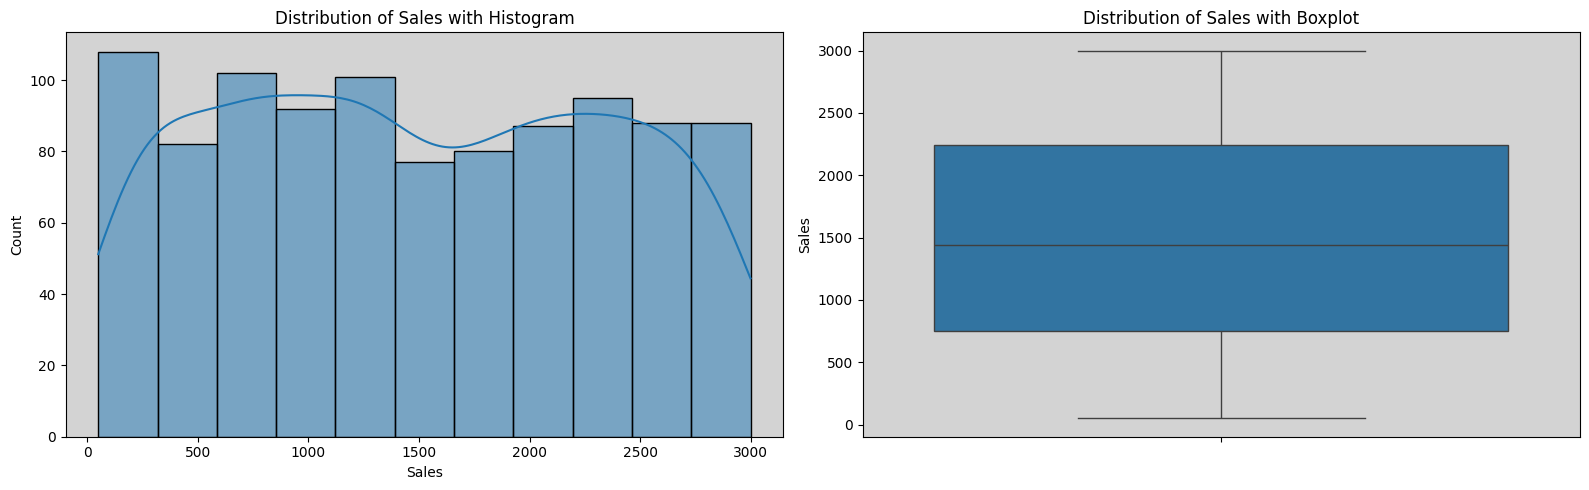

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Plot with Seaborn and then set individual background colors
sns.histplot(data['Sales'], kde=True, ax=axes[0])
axes[0].set_facecolor('lightgrey')
axes[0].set_title('Distribution of Sales with Histogram')

sns.boxplot(data['Sales'], ax=axes[1])
axes[1].set_facecolor('lightgrey')  # Light green
axes[1].set_title('Distribution of Sales with Boxplot')

plt.tight_layout()
plt.show()

#### Profit Analysis

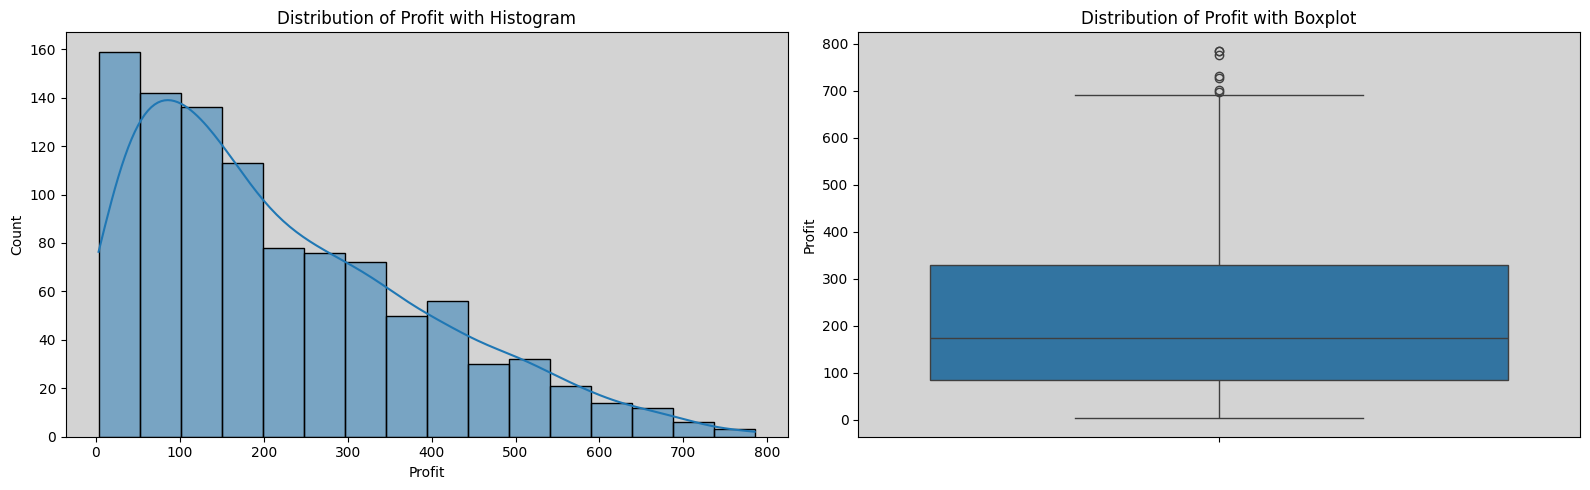

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Plot with Seaborn and then set individual background colors
sns.histplot(data['Profit'], kde=True, ax=axes[0])
axes[0].set_facecolor('lightgrey')
axes[0].set_title('Distribution of Profit with Histogram')

sns.boxplot(data['Profit'], ax=axes[1])
axes[1].set_facecolor('lightgrey')  # Light green
axes[1].set_title('Distribution of Profit with Boxplot')

plt.tight_layout()
plt.show()

#### Discount Analysis

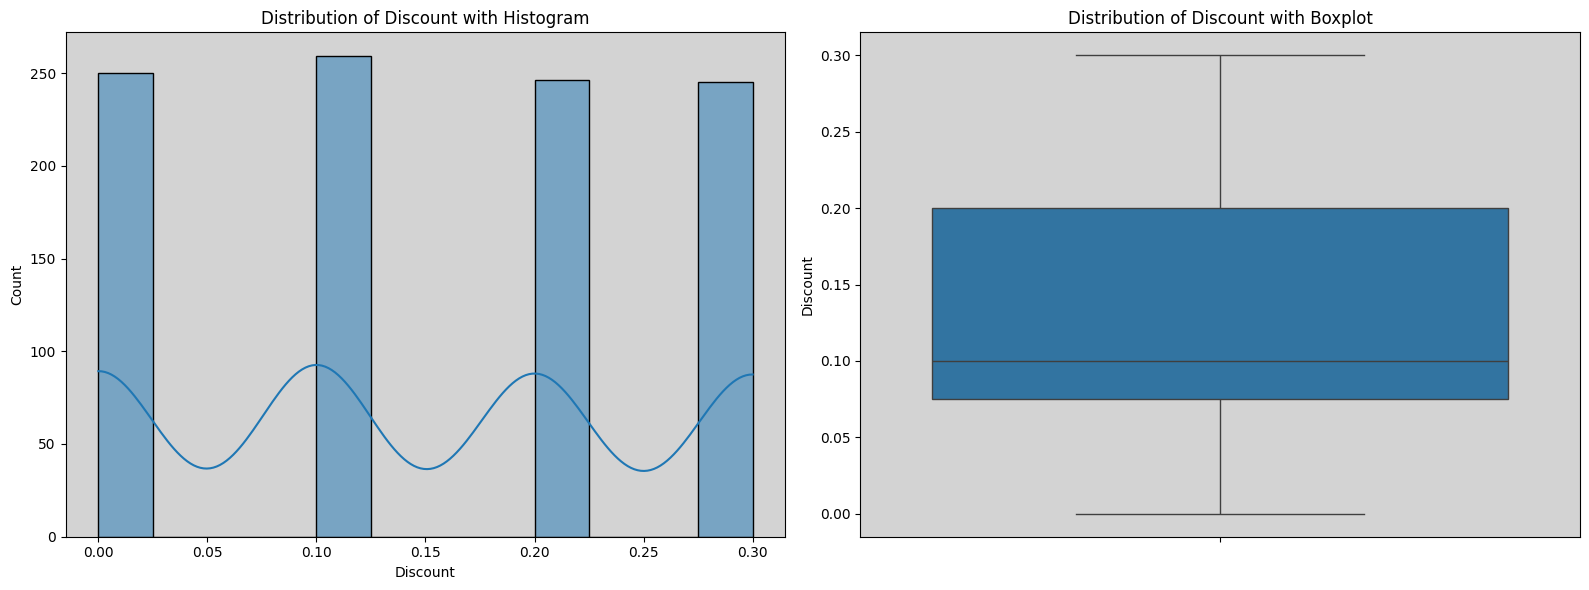

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot with Seaborn and then set individual background colors
sns.histplot(data['Discount'], kde=True, ax=axes[0])
axes[0].set_facecolor('lightgrey')
axes[0].set_title('Distribution of Discount with Histogram')

sns.boxplot(data['Discount'], ax=axes[1])
axes[1].set_facecolor('lightgrey')  # Light green
axes[1].set_title('Distribution of Discount with Boxplot')

plt.tight_layout()
plt.show()

#### Quantity Analysis

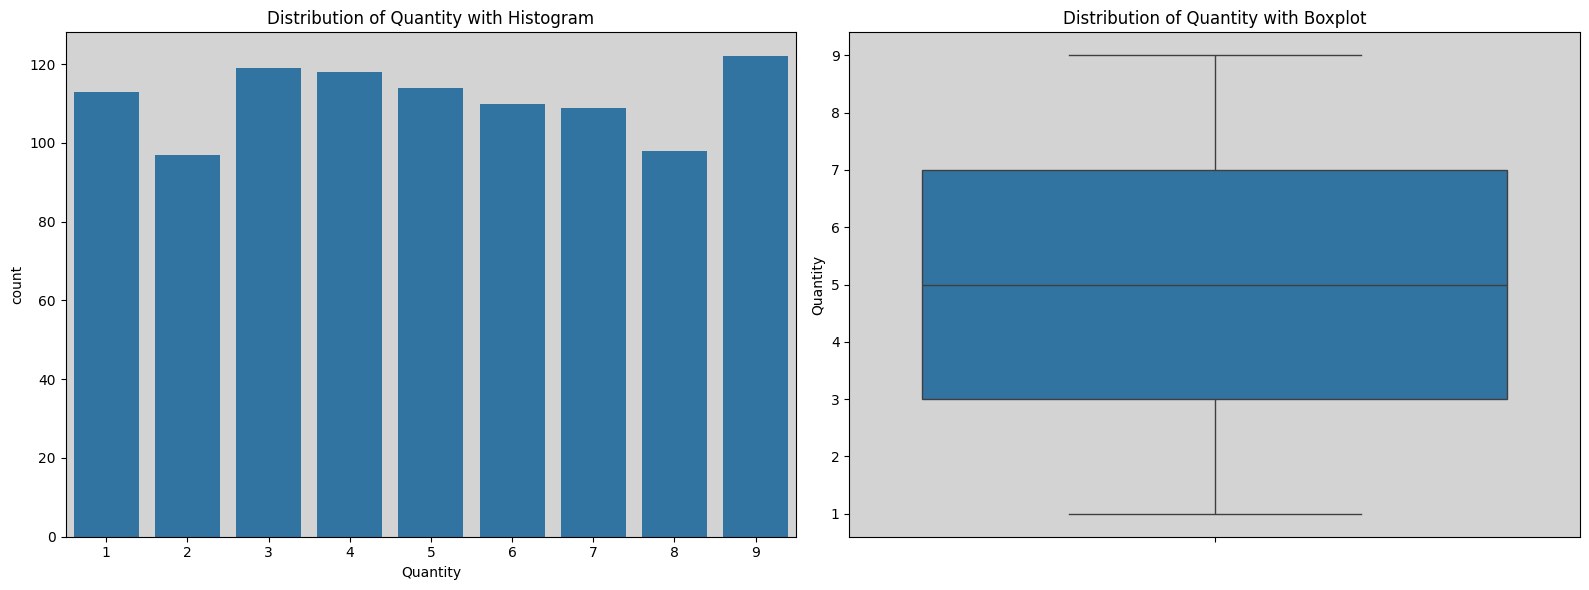

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot with Seaborn and then set individual background colors
sns.countplot(x=data['Quantity'], ax=axes[0])
axes[0].set_facecolor('lightgrey')
axes[0].set_title('Distribution of Quantity with Histogram')


sns.boxplot(data['Quantity'], ax=axes[1])
axes[1].set_facecolor('lightgrey')  # Light green
axes[1].set_title('Distribution of Quantity with Boxplot')

plt.tight_layout()
plt.show()

#### Category Analysis

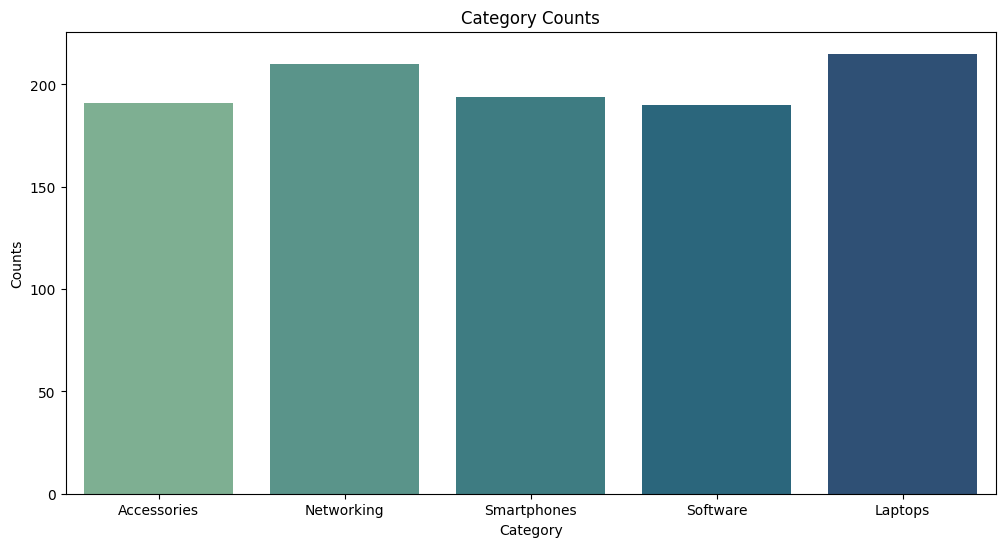

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x=data['Category'], palette='crest', hue=data['Category'])
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.show()

In [19]:
data.head()

,OrderID,OrderDate,Region,CustomerSegment,Category,Product,Sales,Quantity,Discount,Profit,ShippingMode,Year
0,ORD10000,2022-05-02,Africa,Enterprise,Accessories,Keyboard,1154.89,8,0.0,230.07,Second Class,2022
1,ORD10001,2023-10-26,Europe,Small Business,Networking,Router,510.18,8,0.0,102.18,Same Day,2023
2,ORD10002,2023-02-18,Asia-Pacific,Enterprise,Smartphones,Samsung Galaxy S22,1970.12,5,0.1,408.70,First Class,2023
3,ORD10003,2022-01-22,Africa,Consumer,Smartphones,Google Pixel 6,676.40,5,0.0,85.27,Same Day,2022
4,ORD10004,2023-05-26,Middle East,Small Business,Software,CRM Tool,70.85,9,0.0,12.84,First Class,2023


In [20]:
data['ShippingMode'].unique()

array(['Second Class', 'Same Day', 'First Class', 'Standard Class'],
      dtype=object)

In [21]:
data['Category'].unique()

array(['Accessories', 'Networking', 'Smartphones', 'Software', 'Laptops'],
      dtype=object)

In [22]:
data['CustomerSegment'].unique()

array(['Enterprise', 'Small Business', 'Consumer', 'Corporate'],
      dtype=object)

In [23]:
data['Product'].value_counts()


Product
Google Pixel 6        63
Wireless Mouse        61
iPhone 14             58
HP Spectre            58
Lenovo ThinkPad       56
Antivirus Pro         56
Switch                55
CRM Tool              54
Modem                 54
MacBook Air           53
Firewall Device       52
Router                49
Dell XPS              48
Laptop Bag            46
MS Office             44
Keyboard              42
Headphones            42
OnePlus 9             38
Adobe Suite           36
Samsung Galaxy S22    35
Name: count, dtype: int64

In [24]:
profit_region = data.groupby('Region')['Profit'].sum().reset_index()
profit_region

,Region,Profit
0,Africa,34622.34
1,Asia-Pacific,33642.66
2,Europe,36848.33
3,Middle East,42134.22
4,North America,43130.74
5,South America,30377.77


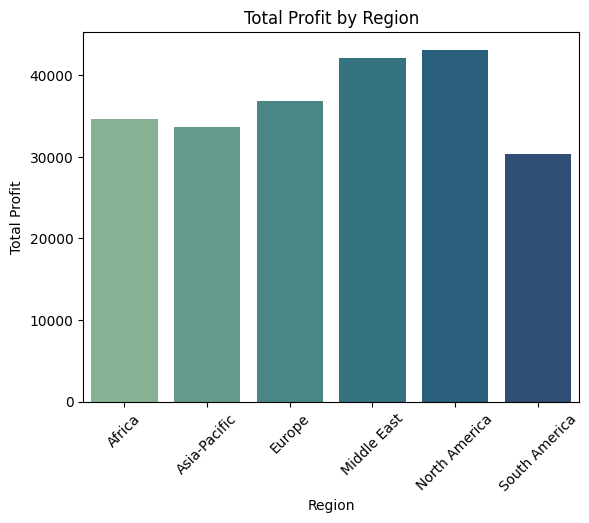

In [25]:
sns.barplot(x='Region', y='Profit', data=profit_region, palette='crest', hue = 'Region')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Total Profit by Region')
plt.show()

In [26]:
profit_region = data.groupby('Category')['Profit'].sum()
profit_region

Category
Accessories    40666.42
Laptops        50781.62
Networking     44401.62
Smartphones    41410.06
Software       43496.34
Name: Profit, dtype: float64

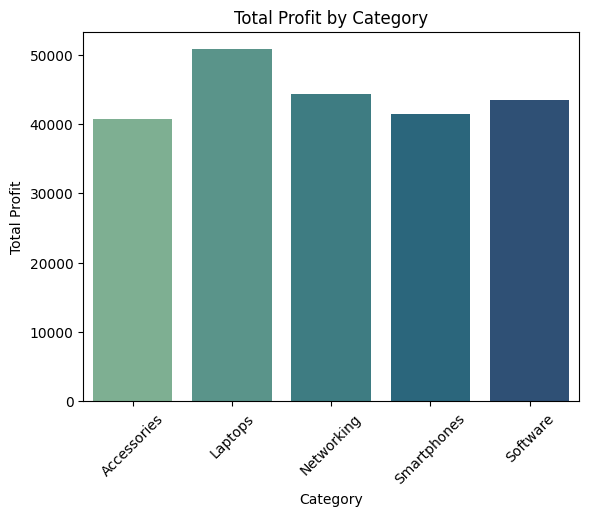

In [27]:
sns.barplot(x=profit_region.index, y=profit_region.values, palette='crest', hue= profit_region.index)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.title('Total Profit by Category')
plt.show()

In [28]:
category_quantity = data.groupby(['Category', 'Region'])['Quantity'].sum()
category_quantity = pd.DataFrame(category_quantity)
category_quantity

Quantity
Category    Region                 
Accessories Africa              165
            Asia-Pacific        154
            Europe              148
            Middle East         131
            North America       217
            South America       158
Laptops     Africa              156
            Asia-Pacific        221
            Europe              170
            Middle East         244
            North America       187
            South America       116
Networking  Africa              161
            Asia-Pacific        181
            Europe              177
            Middle East         176
            North America       192
            South America       172
Smartphones Africa              156
            Asia-Pacific        189
            Europe              150
            Middle East         213
            North America       151
            South America        97
Software    Africa              136
            Asia-Pacific        127
            Europe              194
            Middle East         102
            North America       204
            South America       166

### 2.2 Bivariate Analysis: Pairplots, Correlation heatmaps, and Scatterplots to explore relationships between numeric features. 

In [29]:
data['Month'] = data['OrderDate'].dt.month
data['Month'].unique()


array([ 5, 10,  2,  1,  6, 12,  3,  9,  8,  4, 11,  7], dtype=int32)

### Numerical vs Numerical

Profit vs. Quantity:

Relationship: Generally, we expect a positive correlation: as the quantity of items in an order increases, the total sales value tends to increase as well. However, discounts for bulk orders or different product prices could influence this.

Sales vs. Discount:

Relationship: We might expect a negative correlation: higher discounts could lead to lower overall sales revenue per unit, although they might drive higher quantities sold.
Visualization: Scatter plot (sns.scatterplot(), plt.scatter()).

Sales vs. Profit:

Relationship: We expect a positive correlation: higher sales generally lead to higher profit, assuming costs and discounts are managed. However, high discounts or high costs of goods sold could weaken this relationship.
Visualization: Scatter plot (sns.scatterplot(), plt.scatter()).

Quantity vs. Discount:

Relationship: Businesses might offer higher discounts for larger quantities purchased. This would suggest a positive correlation.
Visualization: Scatter plot (sns.scatterplot(), plt.scatter()).


Quantity vs. Profit:

Relationship: More items sold could lead to higher total profit, but this depends on the profit margin per item and any quantity-based discounts.
Visualization: Scatter plot (sns.scatterplot(), plt.scatter()).

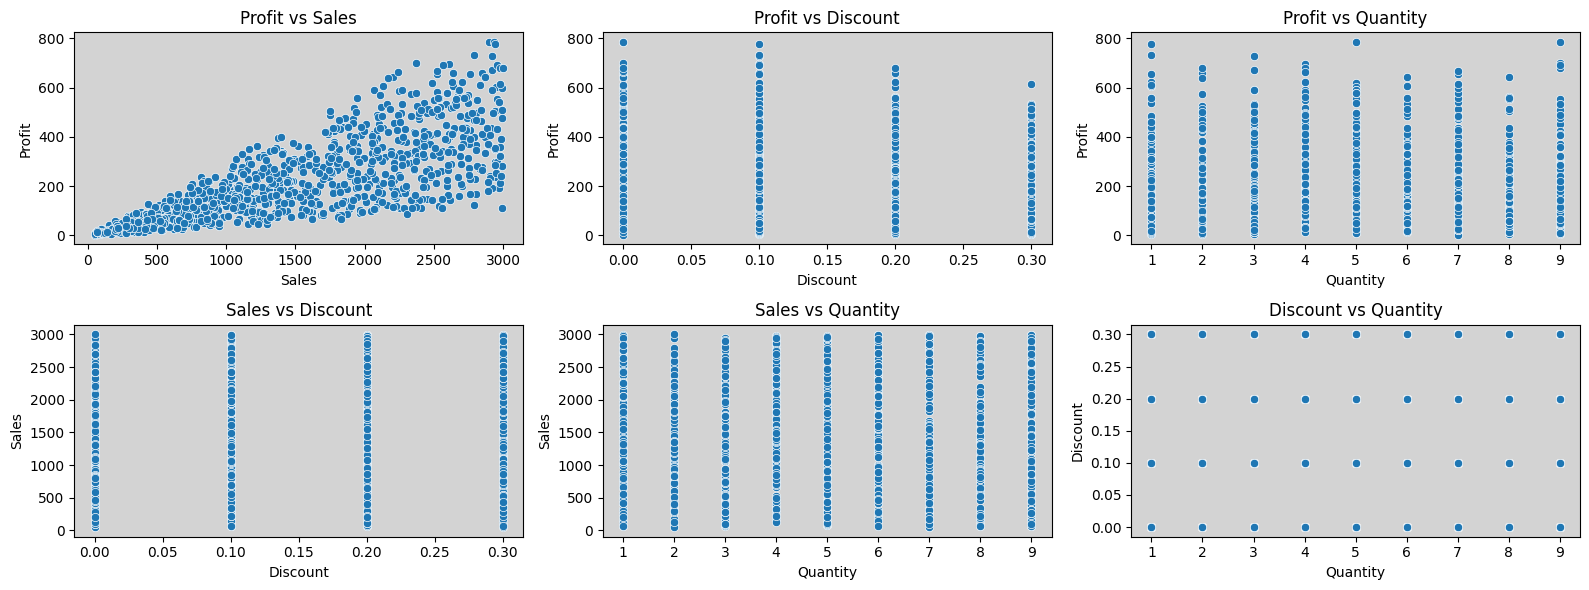

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 6))

sns.scatterplot(x=data['Sales'], y=data['Profit'], ax=axes[0, 0])
axes[0, 0].set_facecolor('lightgrey')
axes[0, 0].set_title('Profit vs Sales')


sns.scatterplot(x=data['Discount'], y=data['Profit'], ax=axes[0, 1])
axes[0, 1].set_facecolor('lightgrey')  # Light green
axes[0, 1].set_title('Profit vs Discount')

sns.scatterplot(x=data['Quantity'], y=data['Profit'], ax=axes[0, 2])
axes[0, 2].set_facecolor('lightgrey')
axes[0, 2].set_title('Profit vs Quantity')


sns.scatterplot(x=data['Discount'], y=data['Sales'], ax=axes[1, 0])
axes[1, 0].set_facecolor('lightgrey')  # Light green
axes[1, 0].set_title('Sales vs Discount')

sns.scatterplot(x=data['Quantity'], y=data['Sales'], ax=axes[1, 1])
axes[1, 1].set_facecolor('lightgrey')
axes[1, 1].set_title('Sales vs Quantity')


sns.scatterplot(x=data['Quantity'], y=data['Discount'], ax=axes[1, 2])
axes[1, 2].set_facecolor('lightgrey')  # Light green
axes[1, 2].set_title('Discount vs Quantity')

plt.tight_layout()
plt.show()

### Categorical vs Numerical


Region vs. Sales/Quantity/Discount/Profit:

Relationship: Are average sales, order sizes, discount rates, or profitability different across different regions?


Visualization: 
Bar plots (sns.barplot(), plt.bar()) showing the mean of the numerical feature for each region. 
Box plots (sns.boxplot(), plt.boxplot()) to see the distribution within each region. 
Violin plots (sns.violinplot(), plt.violinplot()) for a combination of distribution and summary statistics.

C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\4025349387.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\4025349387.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\4025349387.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\4025349387.py:36: UserWarning: set_ticklabels() should only be used with a fixed number 

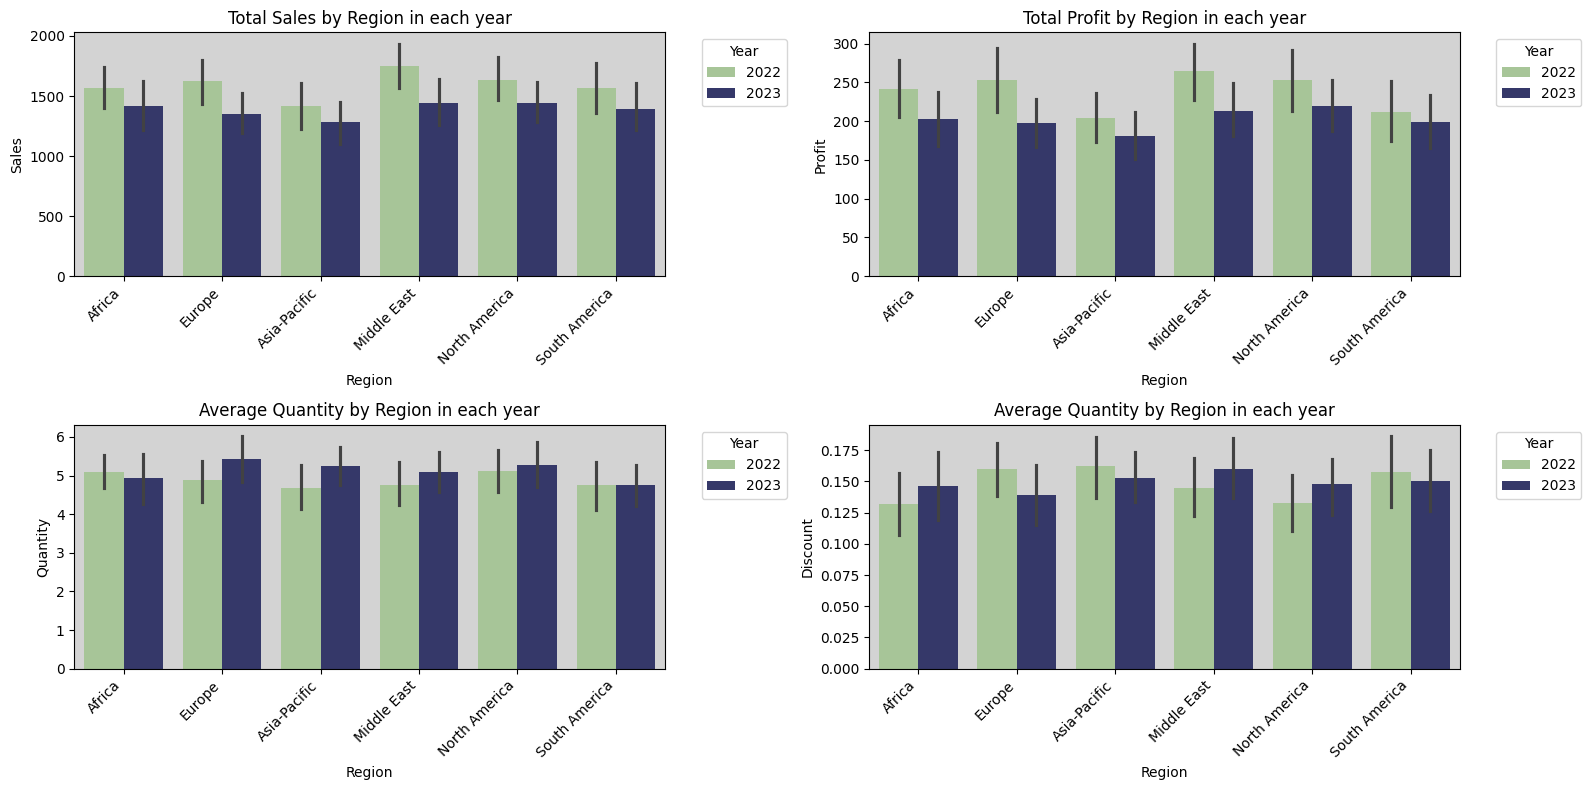

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

sns.barplot(x=data['Region'], y=data['Sales'], palette='crest', hue=data['Year'], ax=axes[0, 0])
axes[0,0].set_facecolor('lightgrey')
axes[0,0].set_title('Total Sales by Region in each year')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[0,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].set_xlabel('Region')
axes[0,0].set_ylabel('Sales')


sns.barplot(x='Region', y='Profit', data=data, palette='crest', hue = 'Year', ax=axes[0, 1])
axes[0,1].set_facecolor('lightgrey')
axes[0,1].set_title('Total Profit by Region in each year')
axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[0,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].set_xlabel('Region')
axes[0,1].set_ylabel('Profit')

sns.barplot(x='Region', y='Quantity', data=data, palette='crest', hue = 'Year', ax=axes[1,0])
axes[1,0].set_facecolor('lightgrey')
axes[1,0].set_title('Average Quantity by Region in each year')
axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[1,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].set_xlabel('Region')
axes[1,0].set_ylabel('Quantity')


sns.barplot(x='Region', y='Discount', data=data, palette='crest', hue = 'Year', ax=axes[1,1])
axes[1,1].set_facecolor('lightgrey')
axes[1,1].set_title('Average Quantity by Region in each year')
axes[1,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[1,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].set_xlabel('Region')
axes[1,1].set_ylabel('Discount')


plt.tight_layout()
plt.show()

CustomerSegment vs. Sales/Quantity/Discount/Profit:

Relationship: Do different customer segments (e.g., Enterprise, Consumer) tend to place larger orders, receive different discounts, or generate varying levels of profit?
Visualization: Similar to 'Region vs. Numerical' (bar plots, box plots, violin plots).


C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\2565930460.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\2565930460.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\2565930460.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\2565930460.py:34: UserWarning: set_ticklabels() should only be used with a fixed number o

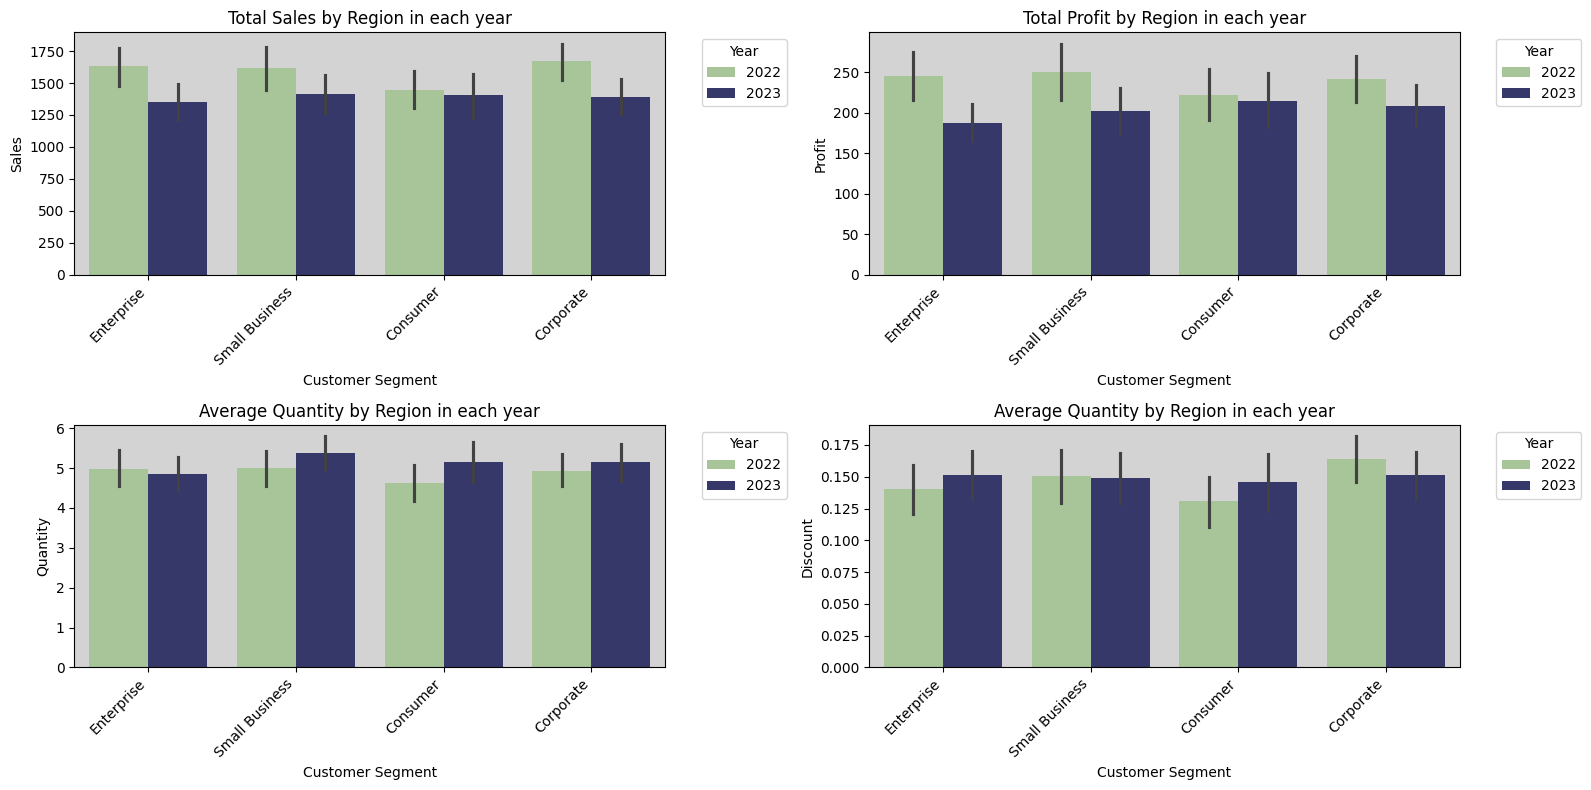

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))


sns.barplot(x=data['CustomerSegment'], y=data['Sales'], palette='crest', hue=data['Year'], ax=axes[0, 0])
axes[0,0].set_facecolor('lightgrey')
axes[0,0].set_title('Total Sales by Region in each year')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[0,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].set_xlabel('Customer Segment')
axes[0,0].set_ylabel('Sales')


sns.barplot(x='CustomerSegment', y='Profit', data=data, palette='crest', hue = 'Year', ax=axes[0, 1])
axes[0,1].set_facecolor('lightgrey')
axes[0,1].set_title('Total Profit by Region in each year')
axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[0,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].set_xlabel('Customer Segment')
axes[0,1].set_ylabel('Profit')

sns.barplot(x='CustomerSegment', y='Quantity', data=data, palette='crest', hue = 'Year', ax=axes[1,0])
axes[1,0].set_facecolor('lightgrey')
axes[1,0].set_title('Average Quantity by Region in each year')
axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[1,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].set_xlabel('Customer Segment')
axes[1,0].set_ylabel('Quantity')


sns.barplot(x='CustomerSegment', y='Discount', data=data, palette='crest', hue = 'Year', ax=axes[1,1])
axes[1,1].set_facecolor('lightgrey')
axes[1,1].set_title('Average Quantity by Region in each year')
axes[1,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[1,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].set_xlabel('Customer Segment')
axes[1,1].set_ylabel('Discount')


plt.tight_layout()
plt.show()

Category vs. Sales/Quantity/Discount/Profit:
Relationship: Do different product categories have different average sales prices, order quantities, discount levels, or profit margins?
Visualization: 
Similar to 'Region vs. Numerical' (bar plots, box plots, violin plots).


C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\1865631006.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\1865631006.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\1865631006.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\1865631006.py:34: UserWarning: set_ticklabels() should only be used with a fixed number o

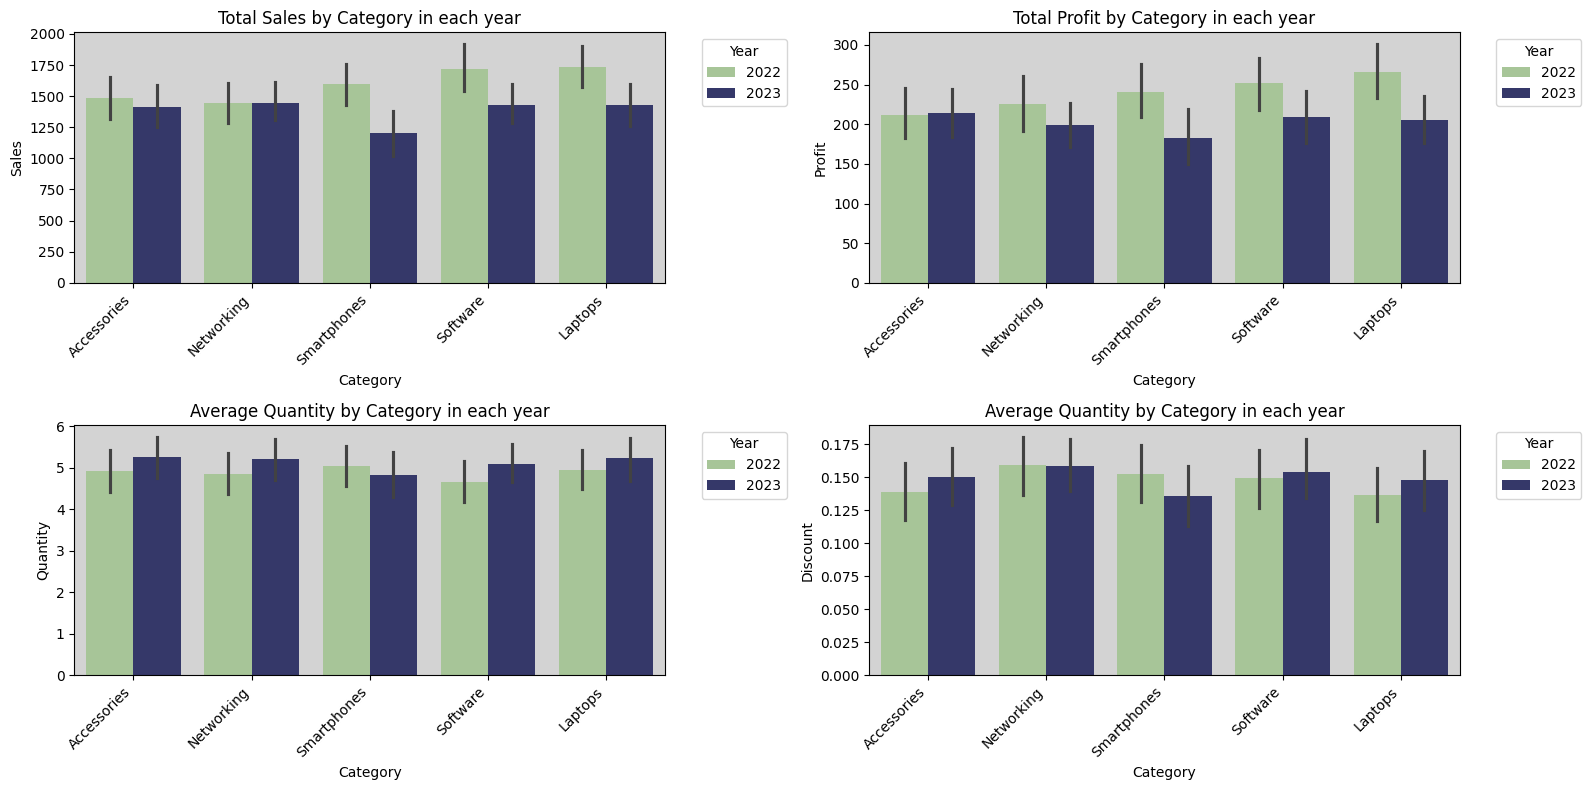

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

sns.barplot(x=data['Category'], y=data['Sales'], palette='crest', hue=data['Year'], ax=axes[0, 0])
axes[0,0].set_facecolor('lightgrey')
axes[0,0].set_title('Total Sales by Category in each year')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[0,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].set_xlabel('Category')
axes[0,0].set_ylabel('Sales')


sns.barplot(x='Category', y='Profit', data=data, palette='crest', hue = 'Year', ax=axes[0, 1])
axes[0,1].set_facecolor('lightgrey')
axes[0,1].set_title('Total Profit by Category in each year')
axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[0,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].set_xlabel('Category')
axes[0,1].set_ylabel('Profit')

sns.barplot(x='Category', y='Quantity', data=data, palette='crest', hue = 'Year', ax=axes[1,0])
axes[1,0].set_facecolor('lightgrey')
axes[1,0].set_title('Average Quantity by Category in each year')
axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[1,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].set_xlabel('Category')
axes[1,0].set_ylabel('Quantity')


sns.barplot(x='Category', y='Discount', data=data, palette='crest', hue = 'Year', ax=axes[1,1])
axes[1,1].set_facecolor('lightgrey')
axes[1,1].set_title('Average Quantity by Category in each year')
axes[1,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[1,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].set_xlabel('Category')
axes[1,1].set_ylabel('Discount')


plt.tight_layout()
plt.show()

Product vs. Sales/Quantity/Discount/Profit:
Relationship: Which products are the top sellers (by value or quantity)? Which products tend to have higher discounts or profit margins?
Visualization: Bar plots (sns.barplot(), plt.bar()) showing aggregated sales, quantity, or profit per product (potentially showing only the top N products for better readability). Box plots to see the distribution of sales or profit for individual products.


C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\1909634023.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\1909634023.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\1909634023.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\1909634023.py:34: UserWarning: set_ticklabels() should only be used with a fixed number o

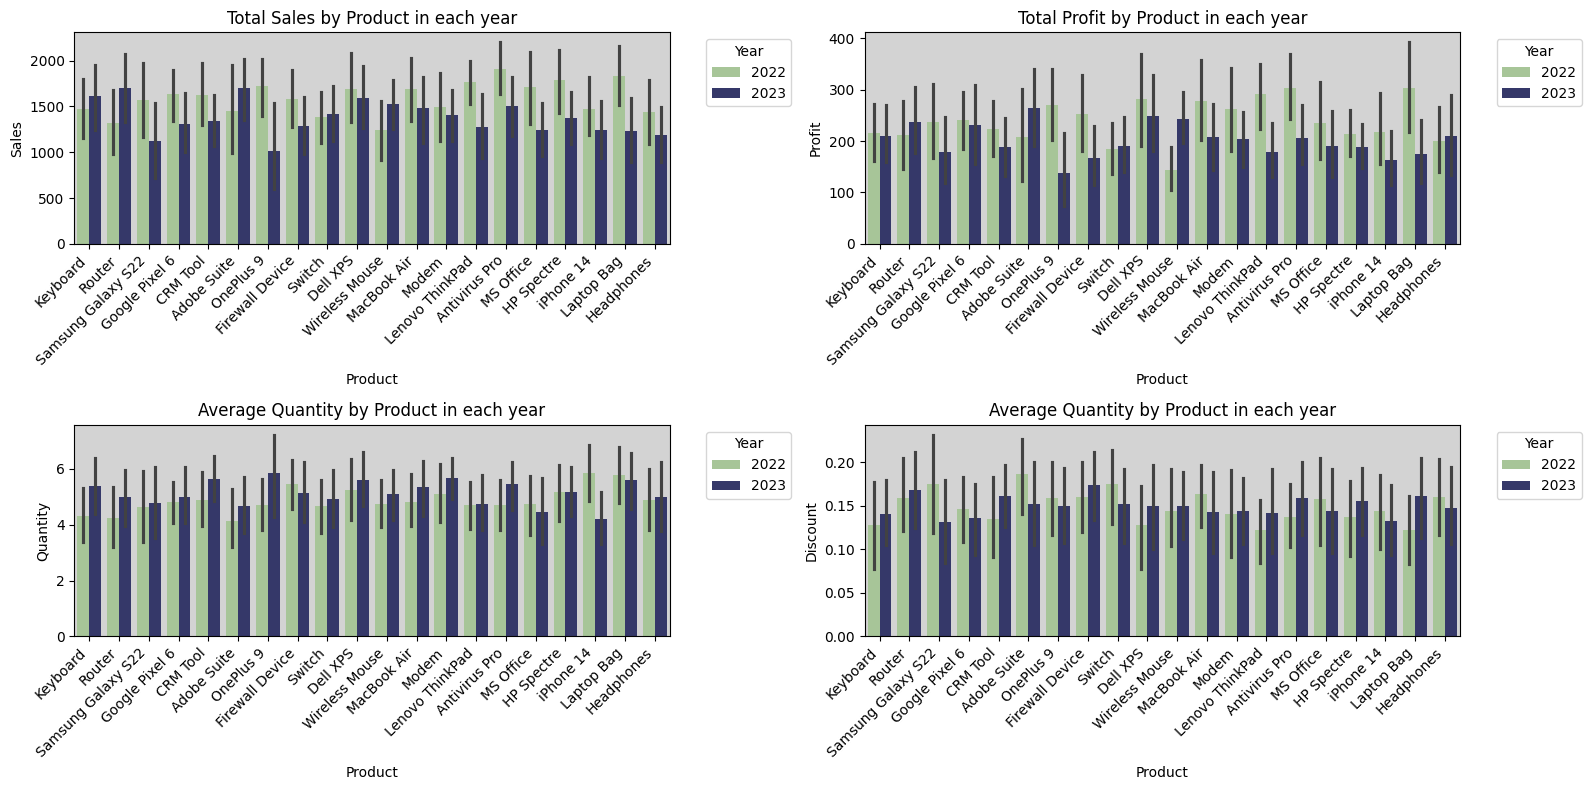

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

sns.barplot(x=data['Product'], y=data['Sales'], palette='crest', hue=data['Year'], ax=axes[0, 0])
axes[0,0].set_facecolor('lightgrey')
axes[0,0].set_title('Total Sales by Product in each year')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[0,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].set_xlabel('Product')
axes[0,0].set_ylabel('Sales')


sns.barplot(x='Product', y='Profit', data=data, palette='crest', hue = 'Year', ax=axes[0, 1])
axes[0,1].set_facecolor('lightgrey')
axes[0,1].set_title('Total Profit by Product in each year')
axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[0,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].set_xlabel('Product')
axes[0,1].set_ylabel('Profit')

sns.barplot(x='Product', y='Quantity', data=data, palette='crest', hue = 'Year', ax=axes[1,0])
axes[1,0].set_facecolor('lightgrey')
axes[1,0].set_title('Average Quantity by Product in each year')
axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[1,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].set_xlabel('Product')
axes[1,0].set_ylabel('Quantity')


sns.barplot(x='Product', y='Discount', data=data, palette='crest', hue = 'Year', ax=axes[1,1])
axes[1,1].set_facecolor('lightgrey')
axes[1,1].set_title('Average Quantity by Product in each year')
axes[1,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[1,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].set_xlabel('Product')
axes[1,1].set_ylabel('Discount')


plt.tight_layout()
plt.show()

ShippingMode vs. Sales/Quantity/Discount/Profit:
Relationship: Does the chosen shipping mode correlate with the order value, quantity, or profitability (e.g., faster shipping might be chosen for higher-value items)?
Visualization: Similar to 'Region vs. Numerical' (bar plots, box plots, violin plots).

C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\822302952.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\822302952.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\822302952.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_14476\822302952.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ti

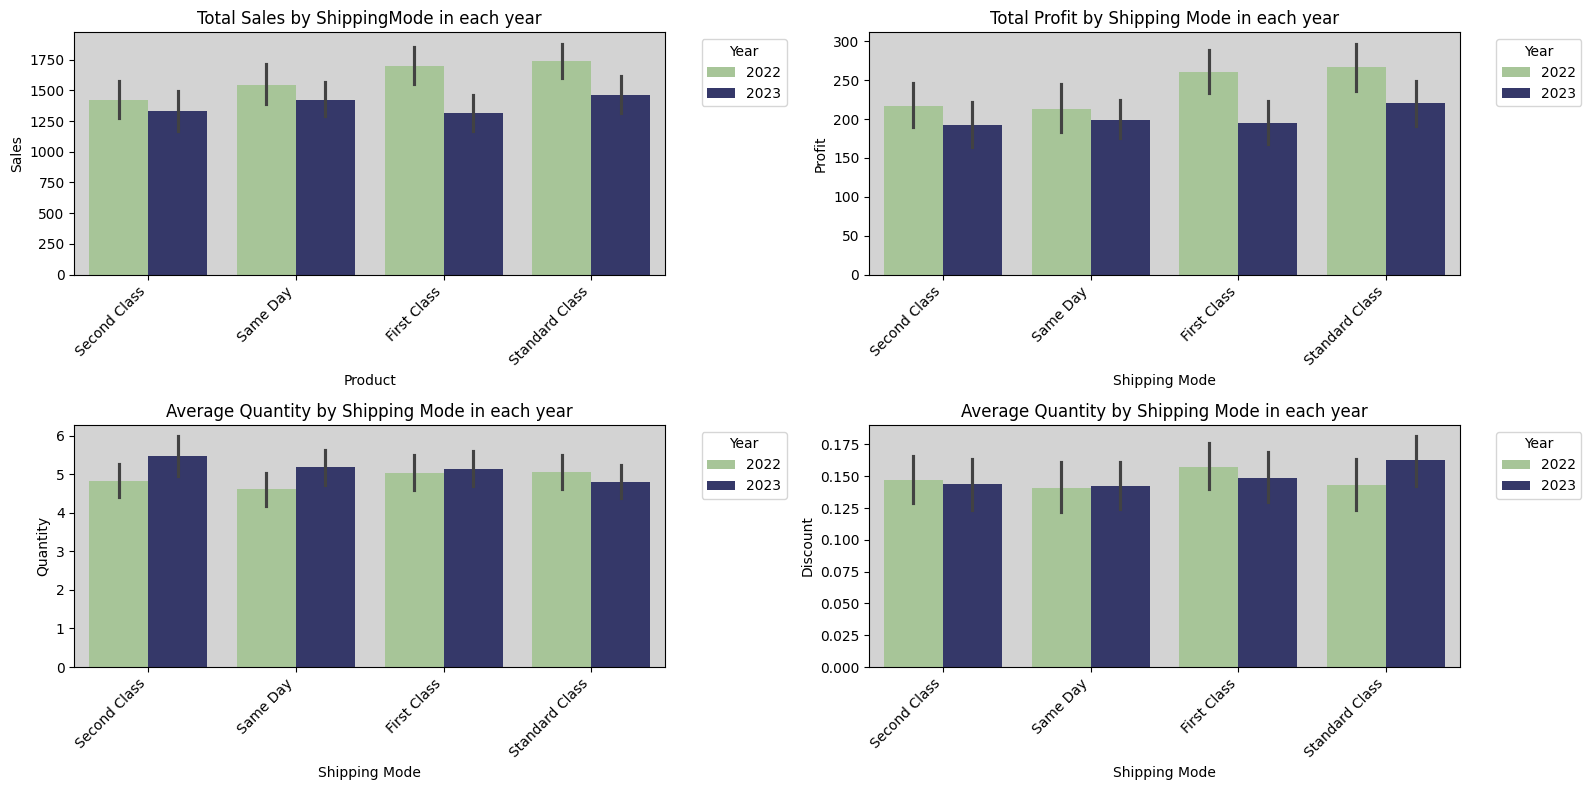

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

sns.barplot(x=data['ShippingMode'], y=data['Sales'], palette='crest', hue=data['Year'], ax=axes[0, 0])
axes[0,0].set_facecolor('lightgrey')
axes[0,0].set_title('Total Sales by ShippingMode in each year')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[0,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].set_xlabel('Product')
axes[0,0].set_ylabel('Sales')

sns.barplot(x='ShippingMode', y='Profit', data=data, palette='crest', hue = 'Year', ax=axes[0, 1])
axes[0,1].set_facecolor('lightgrey')
axes[0,1].set_title('Total Profit by Shipping Mode in each year')
axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[0,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].set_xlabel('Shipping Mode')
axes[0,1].set_ylabel('Profit')

sns.barplot(x='ShippingMode', y='Quantity', data=data, palette='crest', hue = 'Year', ax=axes[1,0])
axes[1,0].set_facecolor('lightgrey')
axes[1,0].set_title('Average Quantity by Shipping Mode in each year')
axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[1,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].set_xlabel('Shipping Mode')
axes[1,0].set_ylabel('Quantity')

sns.barplot(x='ShippingMode', y='Discount', data=data, palette='crest', hue = 'Year', ax=axes[1,1])
axes[1,1].set_facecolor('lightgrey')
axes[1,1].set_title('Average Quantity by Shipping Mode in each year')
axes[1,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[1,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].set_xlabel('Shipping Mode')
axes[1,1].set_ylabel('Discount')


plt.tight_layout()
plt.show()

### Categorical vs. Categorical:


#### Customer

CustomerSegment vs. Category:

Relationship: Do different customer segments tend to purchase specific product categories?
Visualization: Similar to 'Region vs. CustomerSegment' (stacked/grouped bar charts, heatmaps of contingency tables).

CustomerSegment vs. ShippingMode:

Relationship: Do different customer segments prefer certain shipping modes?
Visualization: Similar to 'Region vs. CustomerSegment' (stacked/grouped bar charts, heatmaps of contingency tables).

Category vs. ShippingMode:

Relationship: Are certain product categories more likely to be shipped using specific modes?
Visualization: Similar to 'Region vs. CustomerSegment' (stacked/grouped bar charts, heatmaps of contingency tables).

In [40]:
grouped_data = data.groupby(['Region', 'Category'])['Sales'].mean().unstack()
grouped_data

Category,Accessories,Laptops,Networking,Smartphones,Software
Region,,,,,
Africa,1410.377931,1607.122941,1562.537586,1421.988437,1497.472000
Asia-Pacific,1443.544286,1485.671750,1181.771389,1254.442105,1348.673846
Europe,1498.535484,1590.479063,1279.564706,1391.335714,1667.602895
Middle East,1402.496667,1683.119811,1648.818235,1481.643171,1753.992917
North America,1580.910698,1631.246176,1391.793243,1468.776765,1619.051714
South America,1279.309310,1406.036364,1611.151500,1482.072857,1493.746486


In [41]:
grouped_data.corr()

Category,Accessories,Laptops,Networking,Smartphones,Software
Category,,,,,
Accessories,1.000000,0.588251,-0.577983,-0.176615,0.260596
Laptops,0.588251,1.000000,0.161168,0.294810,0.729170
Networking,-0.577983,0.161168,1.000000,0.824765,0.402367
Smartphones,-0.176615,0.294810,0.824765,1.000000,0.670307
Software,0.260596,0.729170,0.402367,0.670307,1.000000


<Axes: xlabel='Category', ylabel='Category'>

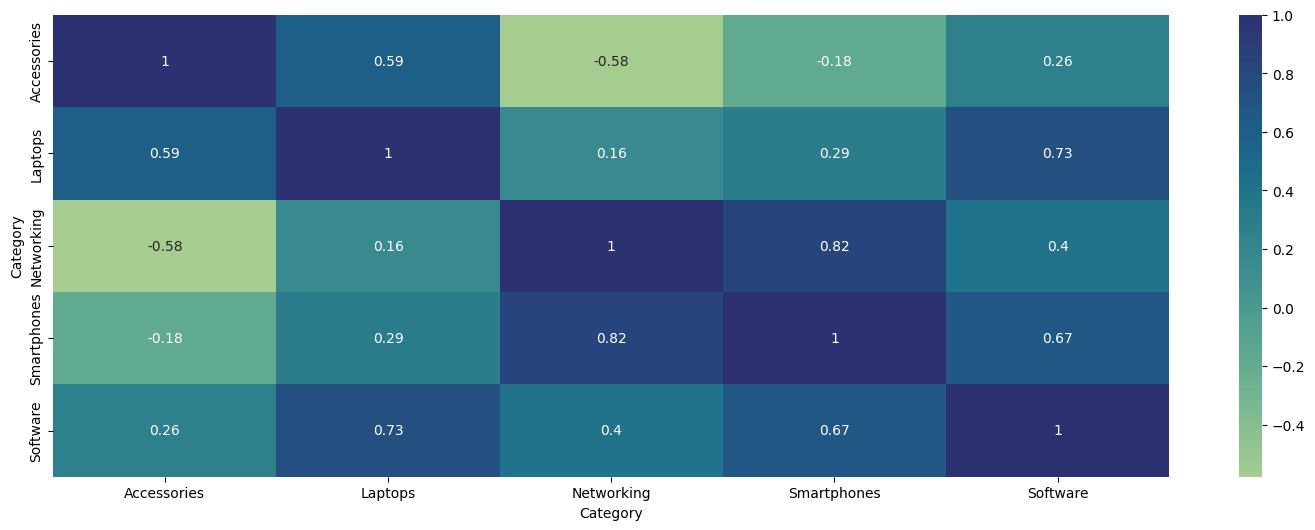

In [99]:
plt.figure(figsize=(18, 6))  
sns.heatmap(grouped_data.corr(), annot=True, cmap='crest')

#### Region

Region vs. CustomerSegment:

Relationship: Is the distribution of customer segments different across various regions?
Visualization: Stacked bar charts (plt.bar() with careful grouping), grouped bar charts (sns.countplot() with the hue parameter), heatmaps of contingency tables (using pd.crosstab() and sns.heatmap()).

Region vs. Category:

Relationship: Are certain product categories more popular in specific regions?
Visualization: Similar to 'Region vs. CustomerSegment' (stacked/grouped bar charts, heatmaps of contingency tables).

Region vs. ShippingMode:

Relationship: Are certain shipping modes preferred in different regions?
Visualization: Similar to 'Region vs. CustomerSegment' (stacked/grouped bar charts, heatmaps of contingency tables).

## 3. Time Series and Trend Analysis (6 Marks)

Convert date-related fields and analyze monthly/yearly sales trends.

Plot time series showing seasonality or growth.

Identify and explain any unusual dips or spikes in data.

In [43]:
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
data['Year'] = data['OrderDate'].dt.year
data['Month'] = data['OrderDate'].dt.month

### Yearly Data Analysis

In [44]:
#Yearly Data
yearly_quantity = data.groupby('Year')['Quantity'].sum()
yearly_sales = data.groupby('Year')['Sales'].sum()
yearly_profit = data.groupby('Year')['Profit'].sum()
yearly_discount = data.groupby('Year')['Discount'].mean()

In [45]:
yearly_data = pd.merge(yearly_quantity, yearly_sales, on='Year')
yearly_data = pd.merge(yearly_data, yearly_profit, on='Year')
yearly_data = pd.merge(yearly_data, yearly_discount, on='Year')

yearly_data

,Quantity,Sales,Profit,Discount
Year,,,,
2022,2421,790669.13,118662.83,0.147475
2023,2590,701208.21,102093.23,0.149703


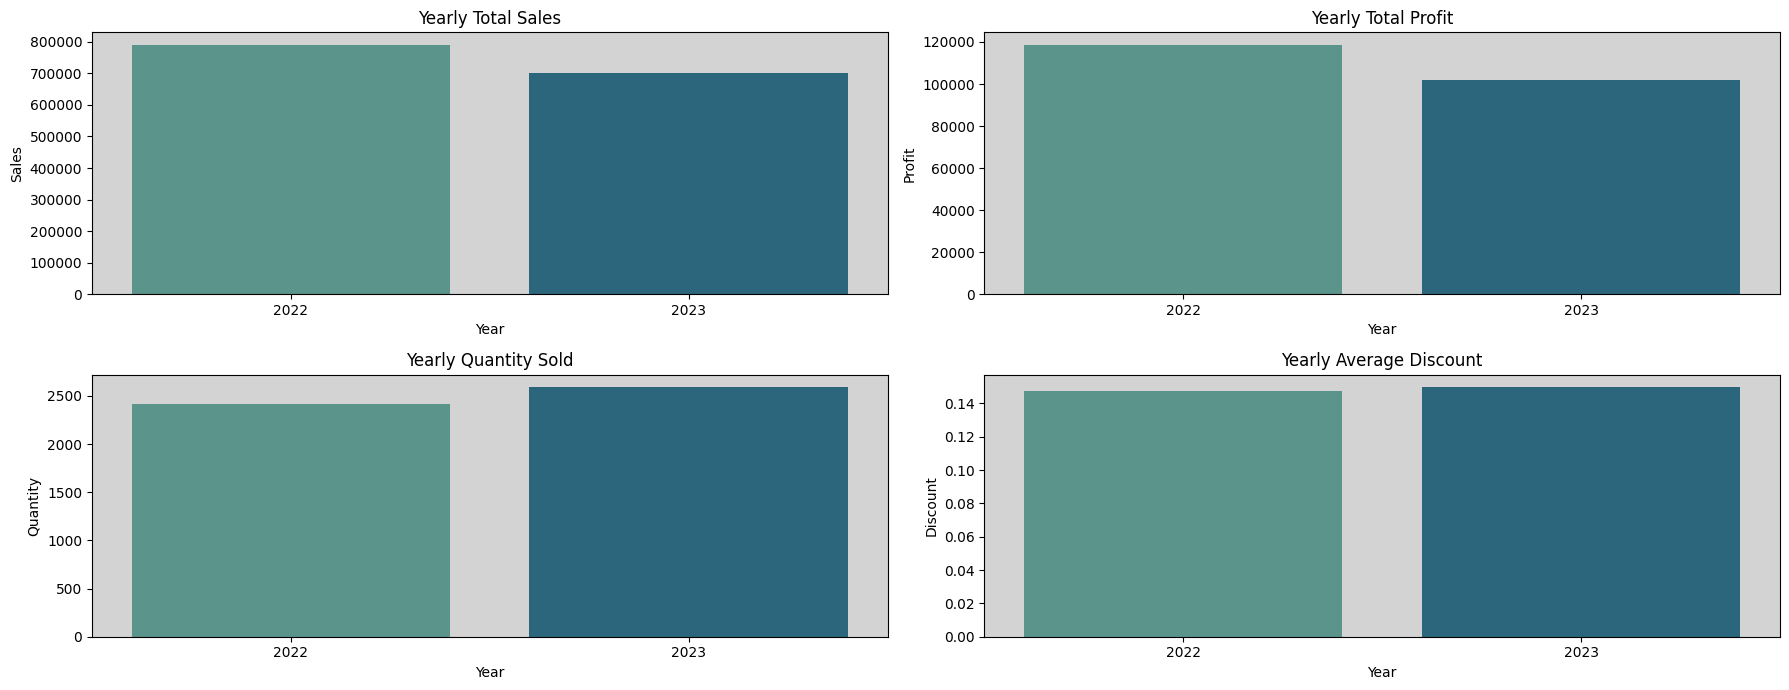

In [46]:
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 7))


# Plot with Seaborn and then set individual background colors
sns.barplot(x='Year', y='Sales', data=yearly_data, palette='crest', dodge=False,ax=axes[0, 0])
axes[0,0].set_facecolor('lightgrey')
axes[0,0].set_title('Yearly Total Sales')
#axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[0,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Sales')


sns.barplot(x='Year', y='Profit', data=yearly_data, palette='crest', dodge=False,ax=axes[0, 1])
axes[0,1].set_facecolor('lightgrey')
axes[0,1].set_title('Yearly Total Profit')
#axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[0,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Profit')

sns.barplot(x='Year', y='Quantity', data=yearly_data, palette='crest', dodge=False,ax=axes[1,0])
axes[1,0].set_facecolor('lightgrey')
axes[1,0].set_title('Yearly Quantity Sold')
#axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[1,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Quantity')


sns.barplot(x='Year', y='Discount', data=yearly_data, palette='crest', dodge=False, ax=axes[1,1])
axes[1,1].set_facecolor('lightgrey')
axes[1,1].set_title('Yearly Average Discount')
#axes[1,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[1,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Discount')


plt.tight_layout()
plt.show()

### Monthly Data Analysis

In [47]:
#data['OrderDate'] = pd.to_datetime(data['OrderDate'], format='%Y-%m-%d')
data['Month'] = data['OrderDate'].dt.strftime('%B')

In [48]:
data['Month']

0           May
1       October
2      February
3       January
4           May
         ...   
995       March
996     January
997        June
998    December
999       March
Name: Month, Length: 1000, dtype: object

In [49]:
#Monthly Data

monthly_quantity = data.groupby('Month')['Quantity'].sum()
monthly_quantity = monthly_quantity.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


monthly_sales = data.groupby('Month')['Sales'].sum()
monthly_sales = monthly_sales.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


monthly_profit = data.groupby('Month')['Profit'].sum()
monthly_profit = monthly_profit.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


monthly_discount = data.groupby('Month')['Discount'].mean()
monthly_discount = monthly_discount.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [50]:
monthly_data = pd.merge(monthly_quantity, monthly_sales, on='Month', suffixes=('Quantity', 'Sales'))

In [51]:
monthly_data = pd.merge(monthly_data, monthly_profit, on='Month', suffixes=('', 'Profit'))
monthly_data = pd.merge(monthly_data, monthly_discount, on='Month', suffixes=('', 'Discount'))

In [52]:
monthly_data

,Quantity,Sales,Profit,Discount
Month,,,,
January,502,136607.52,21551.97,0.153684
February,408,119555.66,17070.18,0.143902
March,386,128920.26,21308.17,0.131646
April,352,118865.45,18026.85,0.134211
May,556,163577.73,25033.85,0.150000
June,345,123310.55,17087.64,0.180000
July,405,110012.46,15342.58,0.145783
August,474,127129.45,17697.08,0.163218
September,401,118799.57,18031.44,0.134667


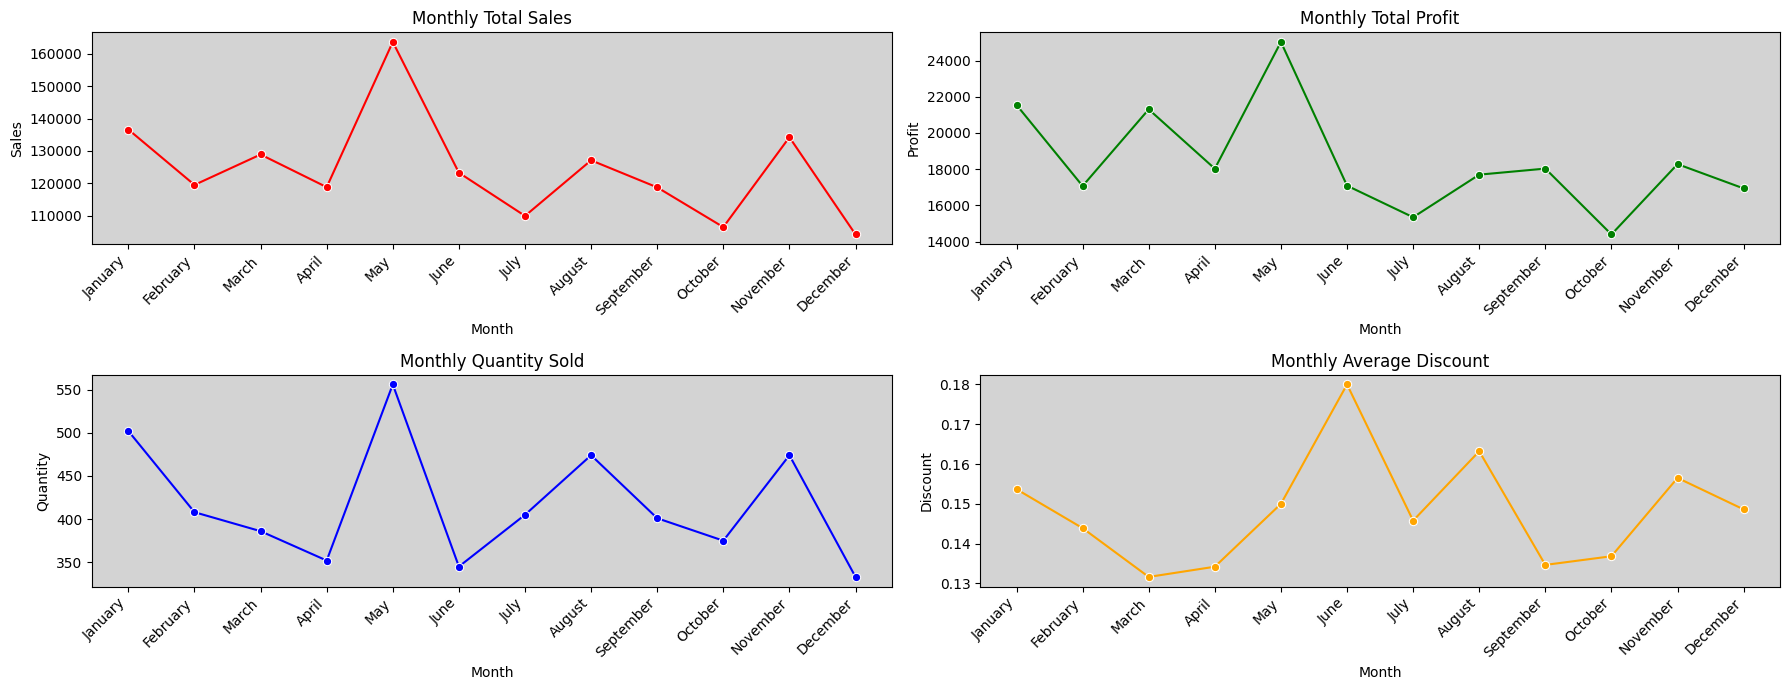

In [53]:
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 7))


# Plot with Seaborn and then set individual background colors
sns.lineplot(x=monthly_data.index, y='Sales', data=monthly_data, color='red', marker='o', ax=axes[0, 0])
axes[0,0].set_facecolor('lightgrey')
axes[0,0].set_title('Monthly Total Sales')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Sales')

sns.lineplot(x=monthly_data.index, y='Profit', data=monthly_data, color='green', marker='o', ax=axes[0, 1])
axes[0,1].set_facecolor('lightgrey')
axes[0,1].set_title('Monthly Total Profit')
axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[0,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Profit')

sns.lineplot(x=monthly_data.index, y='Quantity', data=monthly_data, color='blue', marker='o', ax=axes[1, 0])
axes[1,0].set_facecolor('lightgrey')
axes[1,0].set_title('Monthly Quantity Sold')
axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Quantity')

sns.lineplot(x=monthly_data.index, y='Discount', data=monthly_data, color='orange', marker='o', ax=axes[1, 1])
axes[1,1].set_facecolor('lightgrey')
axes[1,1].set_title('Monthly Average Discount')
axes[1,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Discount')

plt.tight_layout()
plt.show()

## 4. Segment-Level Insights (6 Marks)

Segment the data by Region, Customer Segment, and/or Category.

Use grouped bar charts or treemaps to visualize performance across segments.

Recommend strategies based on underperforming or overperforming segments.

### Category Segmented Data

In [54]:
category_region_sales = data.groupby(['Category', 'Region'])['Sales'].sum().unstack()
category_region_sales = pd.DataFrame(category_region_sales)
category_region_sales

Region,Africa,Asia-Pacific,Europe,Middle East,North America,South America
Category,,,,,,
Accessories,40900.96,50524.05,46454.60,33659.92,67979.16,37099.97
Laptops,54642.18,59426.87,50895.33,89205.35,55462.37,30932.80
Networking,45313.59,42543.77,43505.20,56059.82,51496.35,64446.06
Smartphones,45503.63,47668.80,38957.40,60747.37,49938.41,31123.53
Software,44924.16,35065.52,63368.91,42095.83,56666.81,55268.62


In [55]:
category_sales = data.groupby(['Category'])['Sales'].sum().reset_index()
category_quantity = data.groupby(['Category'])['Quantity'].sum().reset_index()
category_profit = data.groupby(['Category'])['Profit'].sum().reset_index()
category_discount = data.groupby(['Category'])['Discount'].mean().reset_index()


category_data = pd.merge(category_sales, category_quantity, on='Category', suffixes=('', 'Quantity'))
category_data = pd.merge(category_data, category_profit, on='Category', suffixes=('', 'Profit'))
category_data = pd.merge(category_data, category_discount, on='Category', suffixes=('', 'Discount'))

In [56]:
category_data

,Category,Sales,Quantity,Profit,Discount
0,Accessories,276618.66,973,40666.42,0.144503
1,Laptops,340564.90,1094,50781.62,0.142326
2,Networking,303364.79,1059,44401.62,0.159048
3,Smartphones,273939.14,956,41410.06,0.144845
4,Software,297389.85,929,43496.34,0.152105


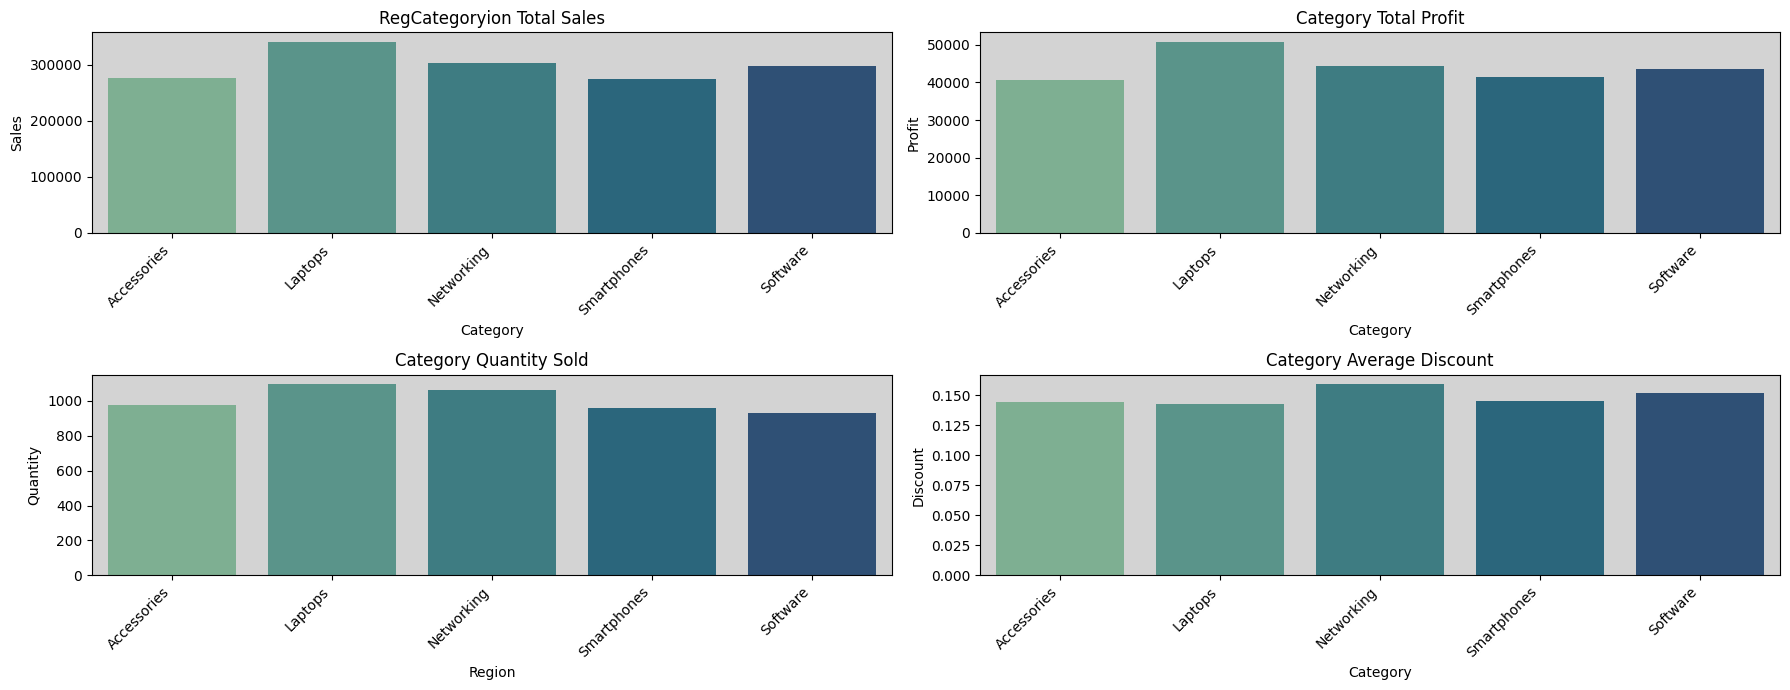

In [57]:
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 7))


# Plot with Seaborn and then set individual background colors
sns.barplot(x='Category', y='Sales', data=category_data, palette='crest', dodge=False,ax=axes[0, 0])
axes[0,0].set_facecolor('lightgrey')
axes[0,0].set_title('RegCategoryion Total Sales')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[0,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].set_xlabel('Category')
axes[0,0].set_ylabel('Sales')


sns.barplot(x='Category', y='Profit', data=category_data, palette='crest', dodge=False,ax=axes[0, 1])
axes[0,1].set_facecolor('lightgrey')
axes[0,1].set_title('Category Total Profit')
axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[0,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].set_xlabel('Category')
axes[0,1].set_ylabel('Profit')

sns.barplot(x='Category', y='Quantity', data=category_data, palette='crest', dodge=False,ax=axes[1,0])
axes[1,0].set_facecolor('lightgrey')
axes[1,0].set_title('Category Quantity Sold')
axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[1,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].set_xlabel('Region')
axes[1,0].set_ylabel('Quantity')


sns.barplot(x='Category', y='Discount', data=category_data, palette='crest', dodge=False, ax=axes[1,1])
axes[1,1].set_facecolor('lightgrey')
axes[1,1].set_title('Category Average Discount')
axes[1,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[1,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].set_xlabel('Category')
axes[1,1].set_ylabel('Discount')


plt.tight_layout()
plt.show()

### Region Segmented Data

In [58]:
region_sales = data.groupby(['Region'])['Sales'].sum().reset_index()
region_quantity = data.groupby(['Region'])['Quantity'].sum().reset_index()
region_profit = data.groupby(['Region'])['Profit'].sum().reset_index()
region_discount = data.groupby(['Region'])['Discount'].mean().reset_index()


region_data = pd.merge(region_sales, region_quantity, on='Region', suffixes=('', 'Quantity'))
region_data = pd.merge(region_data, region_profit, on='Region', suffixes=('', 'Profit'))
region_data = pd.merge(region_data, region_discount, on='Region', suffixes=('', 'Discount'))

In [59]:
region_data

,Region,Sales,Quantity,Profit,Discount
0,Africa,231284.52,774,34622.34,0.138312
1,Asia-Pacific,235229.01,872,33642.66,0.157143
2,Europe,243181.44,839,36848.33,0.149693
3,Middle East,281768.29,866,42134.22,0.152273
4,North America,281543.10,951,43130.74,0.140437
5,South America,218870.98,709,30377.77,0.153691


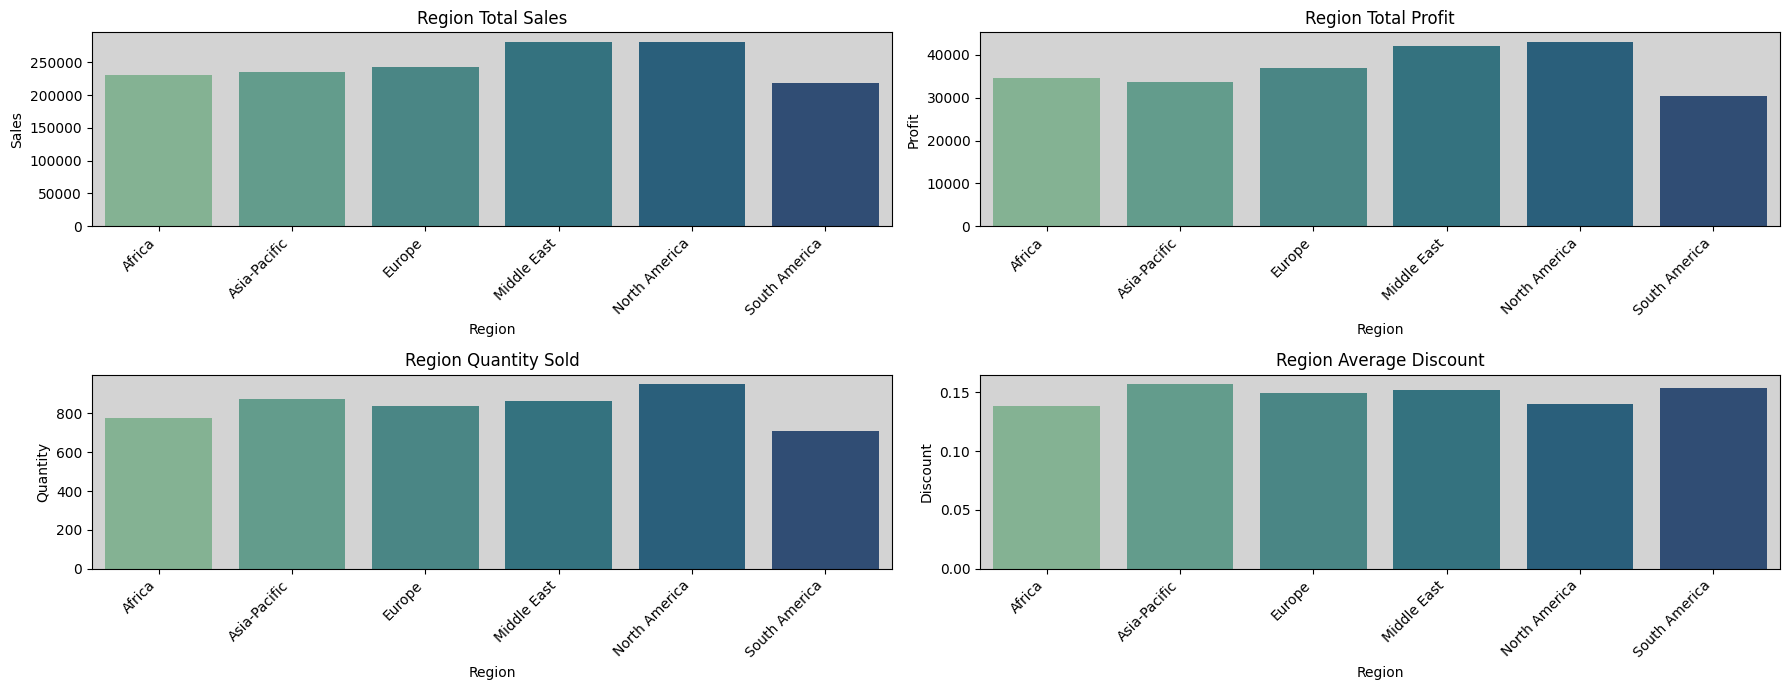

In [60]:
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 7))


# Plot with Seaborn and then set individual background colors
sns.barplot(x='Region', y='Sales', data=region_data, palette='crest', dodge=False,ax=axes[0, 0])
axes[0,0].set_facecolor('lightgrey')
axes[0,0].set_title('Region Total Sales')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[0,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].set_xlabel('Region')
axes[0,0].set_ylabel('Sales')


sns.barplot(x='Region', y='Profit', data=region_data, palette='crest', dodge=False,ax=axes[0, 1])
axes[0,1].set_facecolor('lightgrey')
axes[0,1].set_title('Region Total Profit')
axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[0,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].set_xlabel('Region')
axes[0,1].set_ylabel('Profit')

sns.barplot(x='Region', y='Quantity', data=region_data, palette='crest', dodge=False,ax=axes[1,0])
axes[1,0].set_facecolor('lightgrey')
axes[1,0].set_title('Region Quantity Sold')
axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[1,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].set_xlabel('Region')
axes[1,0].set_ylabel('Quantity')


sns.barplot(x='Region', y='Discount', data=region_data, palette='crest', dodge=False, ax=axes[1,1])
axes[1,1].set_facecolor('lightgrey')
axes[1,1].set_title('Region Average Discount')
axes[1,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[1,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].set_xlabel('Region')
axes[1,1].set_ylabel('Discount')


plt.tight_layout()
plt.show()

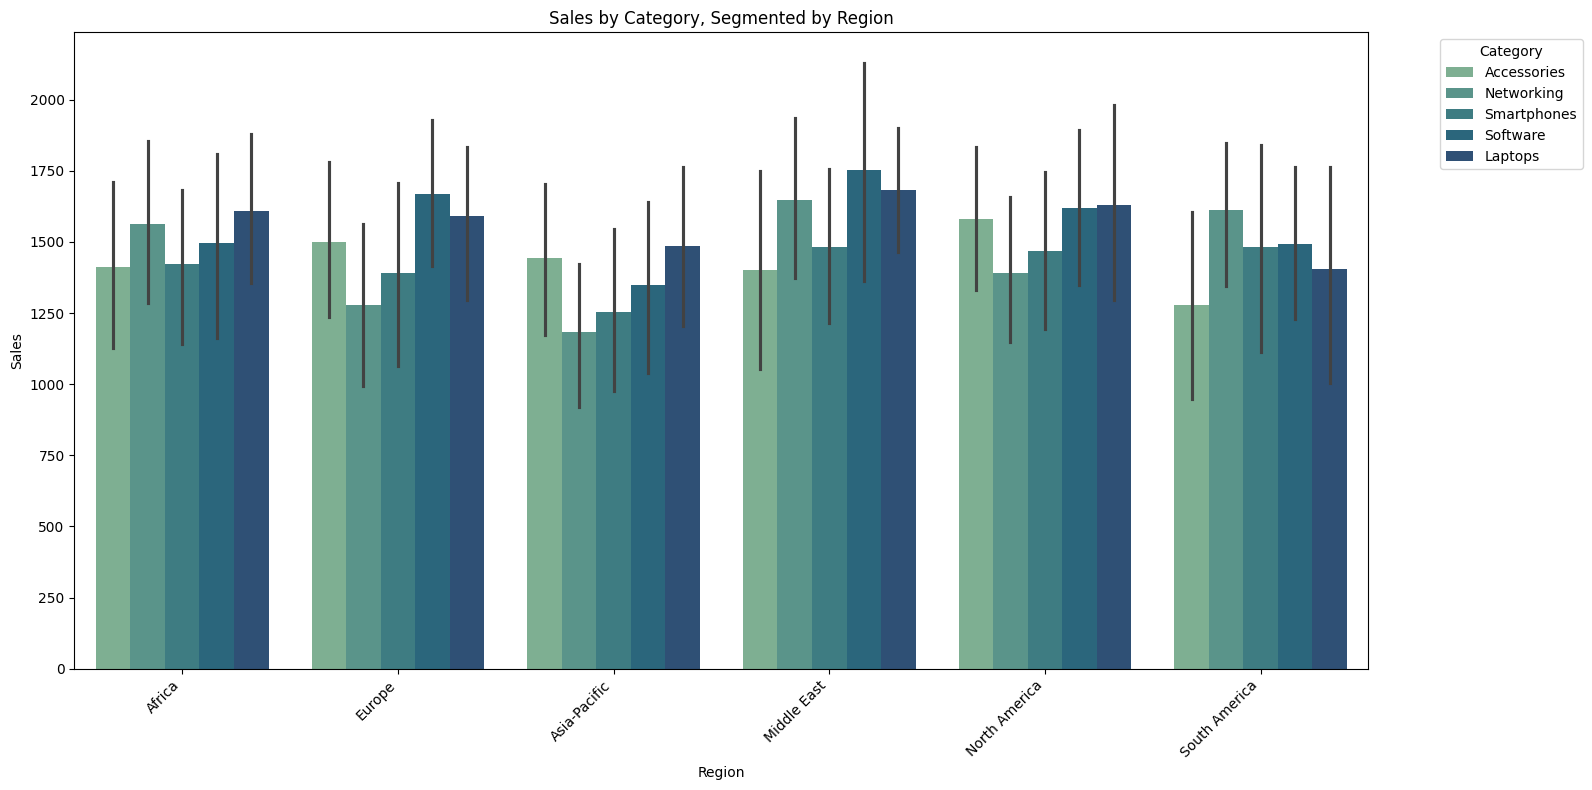

In [61]:
plt.figure(figsize=(16, 8))
sns.barplot(x='Region', y='Sales', hue='Category', data=data, palette='crest', dodge=True)
plt.title('Sales by Category, Segmented by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

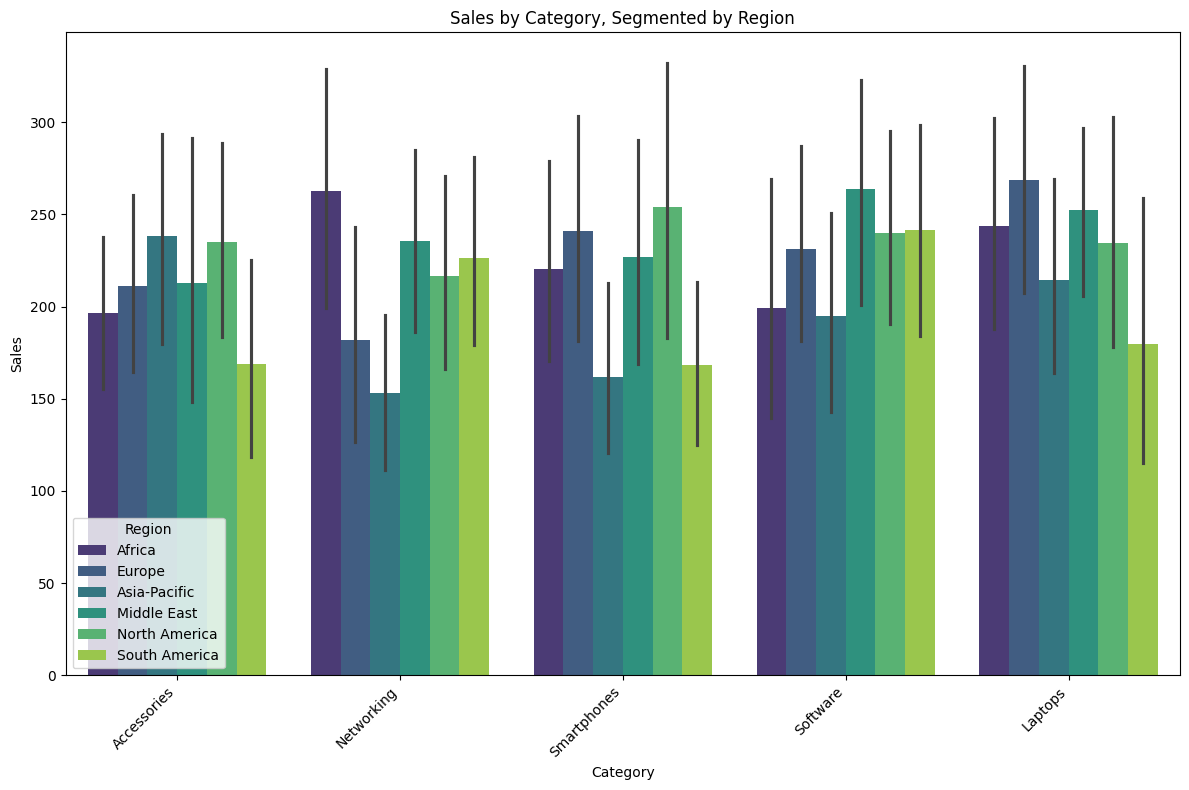

In [62]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Profit', hue='Region', data=data, palette='viridis')
plt.title('Sales by Category, Segmented by Region')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
#plt.legend(title='Region')
plt.tight_layout()
plt.show()

### Customer Segmented Data

In [63]:
customer_seg_sales = data.groupby(['CustomerSegment'])['Sales'].sum().reset_index()
customer_seg_quantity = data.groupby(['CustomerSegment'])['Quantity'].sum().reset_index()
customer_seg_profit = data.groupby(['CustomerSegment'])['Profit'].sum().reset_index()
customer_seg_discount = data.groupby(['CustomerSegment'])['Discount'].mean().reset_index()


customer_seg_data = pd.merge(customer_seg_sales, customer_seg_quantity, on='CustomerSegment', suffixes=('', 'Quantity'))
customer_seg_data = pd.merge(customer_seg_data, customer_seg_profit, on='CustomerSegment', suffixes=('', 'Profit'))
customer_seg_data = pd.merge(customer_seg_data, customer_seg_discount, on='CustomerSegment', suffixes=('', 'Discount'))

In [64]:
customer_seg_data

,CustomerSegment,Sales,Quantity,Profit,Discount
0,Consumer,310707.46,1064,47597.13,0.138073
1,Corporate,430833.57,1410,63204.62,0.158214
2,Enterprise,389842.84,1292,56343.62,0.146008
3,Small Business,360493.47,1245,53610.69,0.149791


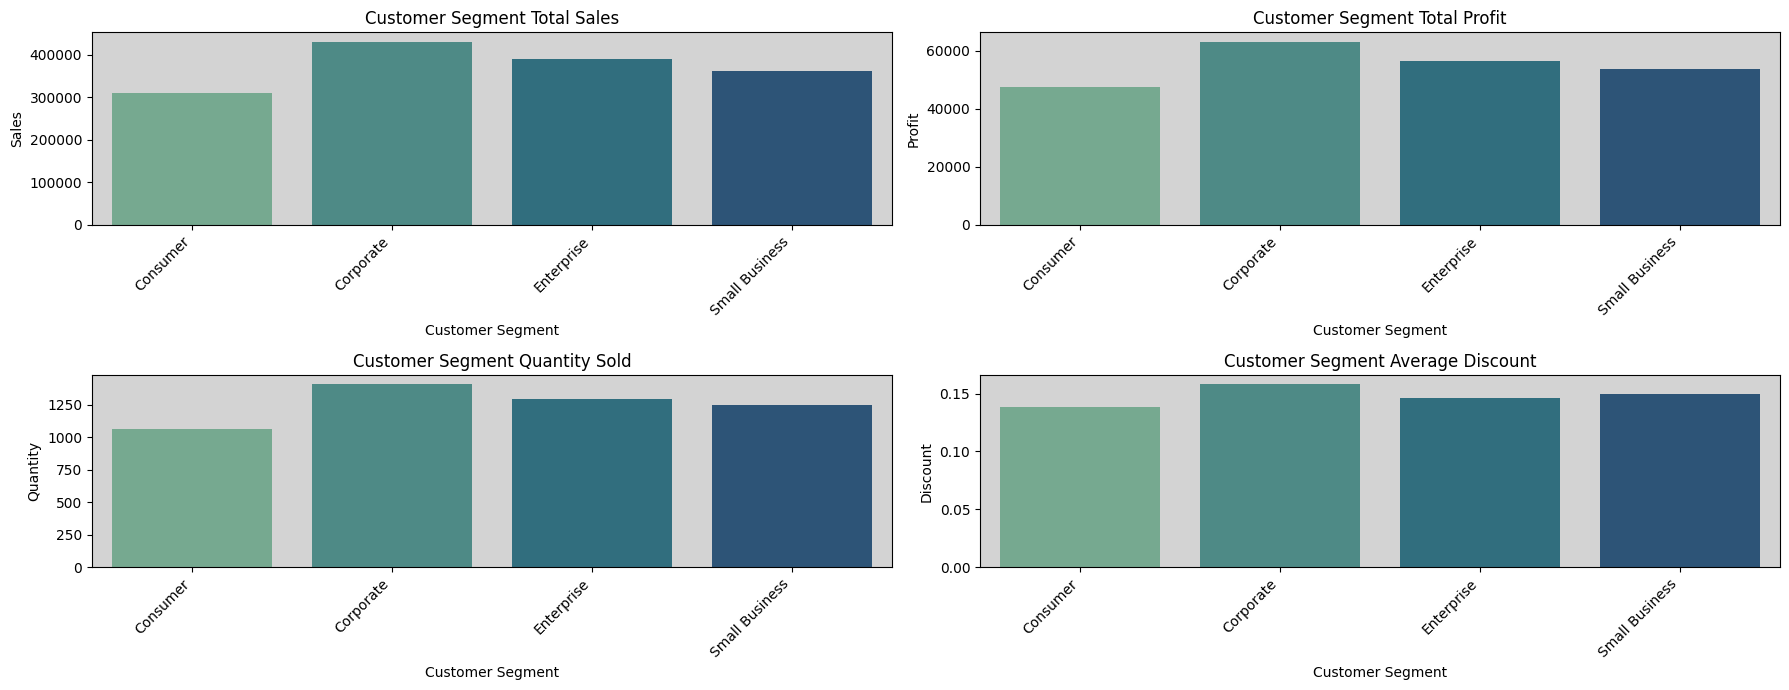

In [65]:
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 7))


# Plot with Seaborn and then set individual background colors
sns.barplot(x='CustomerSegment', y='Sales', data=customer_seg_data, palette='crest', dodge=False,ax=axes[0, 0])
axes[0,0].set_facecolor('lightgrey')
axes[0,0].set_title('Customer Segment Total Sales')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[0,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].set_xlabel('Customer Segment')
axes[0,0].set_ylabel('Sales')


sns.barplot(x='CustomerSegment', y='Profit', data=customer_seg_data, palette='crest', dodge=False,ax=axes[0, 1])
axes[0,1].set_facecolor('lightgrey')
axes[0,1].set_title('Customer Segment Total Profit')
axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[0,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].set_xlabel('Customer Segment')
axes[0,1].set_ylabel('Profit')

sns.barplot(x='CustomerSegment', y='Quantity', data=customer_seg_data, palette='crest', dodge=False,ax=axes[1,0])
axes[1,0].set_facecolor('lightgrey')
axes[1,0].set_title('Customer Segment Quantity Sold')
axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[1,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].set_xlabel('Customer Segment')
axes[1,0].set_ylabel('Quantity')


sns.barplot(x='CustomerSegment', y='Discount', data=customer_seg_data, palette='crest', dodge=False, ax=axes[1,1])
axes[1,1].set_facecolor('lightgrey')
axes[1,1].set_title('Customer Segment Average Discount')
axes[1,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[1,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].set_xlabel('Customer Segment')
axes[1,1].set_ylabel('Discount')


plt.tight_layout()
plt.show()

In [66]:
customer_data = data.groupby(['CustomerSegment', 'Region'])['Sales'].sum().unstack()

### Product Data

In [67]:
product_sales = data.groupby(['Product'])['Sales'].sum().reset_index()
product_quantity = data.groupby(['Product'])['Quantity'].sum().reset_index()
product_profit = data.groupby(['Product'])['Profit'].sum().reset_index()
product_discount = data.groupby(['Product'])['Discount'].mean().reset_index()


product_data = pd.merge(product_sales, product_quantity, on='Product', suffixes=('', 'Quantity'))
product_data = pd.merge(product_data, product_profit, on='Product', suffixes=('', 'Profit'))
product_data = pd.merge(product_data, product_discount, on='Product', suffixes=('', 'Discount'))

In [68]:
product_data

,Product,Sales,Quantity,Profit,Discount
0,Adobe Suite,57348.40,160,8693.93,0.166667
1,Antivirus Pro,97245.24,281,14641.26,0.146429
2,CRM Tool,79118.88,287,10960.30,0.150000
3,Dell XPS,78704.80,261,12698.40,0.139583
4,Firewall Device,74372.82,275,10861.26,0.167308
5,Google Pixel 6,93655.91,308,14879.20,0.141270
6,HP Spectre,90677.12,300,11594.60,0.146552
7,Headphones,56251.20,207,8585.90,0.154762
8,Keyboard,64673.45,203,8943.49,0.133333
9,Laptop Bag,70387.46,262,10985.31,0.141304


### Shipping Data

In [69]:
shipping_mod_sales = data.groupby(['ShippingMode'])['Sales'].sum().reset_index()
shipping_mod_quantity = data.groupby(['ShippingMode'])['Quantity'].sum().reset_index()
shipping_mod_profit = data.groupby(['ShippingMode'])['Profit'].sum().reset_index()
shipping_mod_discount = data.groupby(['ShippingMode'])['Discount'].mean().reset_index()


shipping_mod_data = pd.merge(shipping_mod_sales, shipping_mod_quantity, on='ShippingMode', suffixes=('', 'Quantity'))
shipping_mod_data = pd.merge(shipping_mod_data, shipping_mod_profit, on='ShippingMode', suffixes=('', 'Profit'))
shipping_mod_data = pd.merge(shipping_mod_data, shipping_mod_discount, on='ShippingMode', suffixes=('', 'Discount'))

In [70]:
shipping_mod_data

,ShippingMode,Sales,Quantity,Profit,Discount
0,First Class,379221.38,1280,57338.45,0.153175
1,Same Day,367817.01,1228,51167.91,0.141767
2,Second Class,334936.55,1237,49960.55,0.145868
3,Standard Class,409902.40,1266,62289.15,0.153307


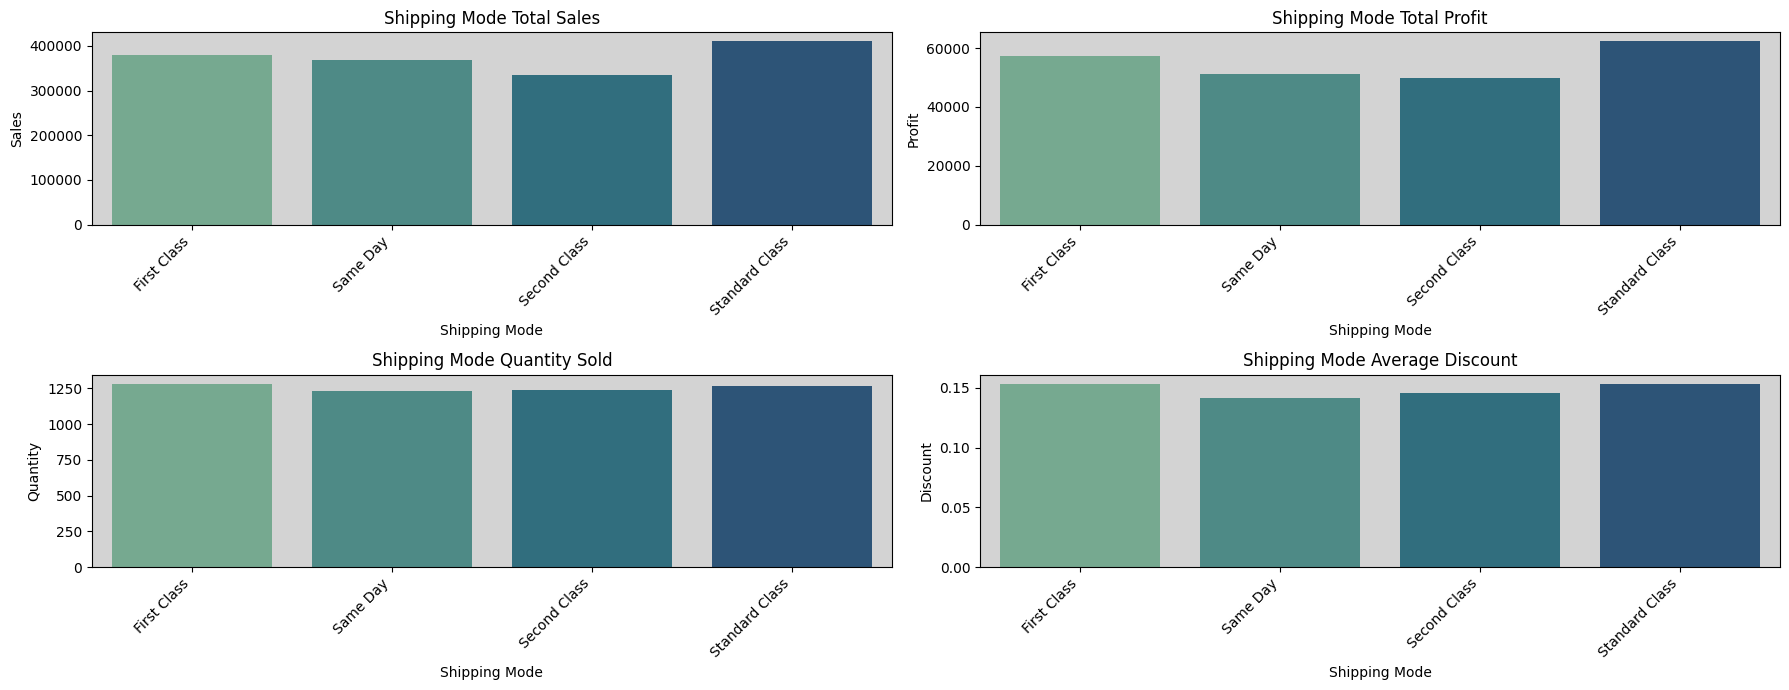

In [71]:
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 7))


# Plot with Seaborn and then set individual background colors
sns.barplot(x='ShippingMode', y='Sales', data=shipping_mod_data, palette='crest', dodge=False,ax=axes[0, 0])
axes[0,0].set_facecolor('lightgrey')
axes[0,0].set_title('Shipping Mode Total Sales')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[0,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].set_xlabel('Shipping Mode')
axes[0,0].set_ylabel('Sales')


sns.barplot(x='ShippingMode', y='Profit', data=shipping_mod_data, palette='crest', dodge=False,ax=axes[0, 1])
axes[0,1].set_facecolor('lightgrey')
axes[0,1].set_title('Shipping Mode Total Profit')
axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[0,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].set_xlabel('Shipping Mode')
axes[0,1].set_ylabel('Profit')

sns.barplot(x='ShippingMode', y='Quantity', data=shipping_mod_data, palette='crest', dodge=False,ax=axes[1,0])
axes[1,0].set_facecolor('lightgrey')
axes[1,0].set_title('Shipping Mode Quantity Sold')
axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[1,0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].set_xlabel('Shipping Mode')
axes[1,0].set_ylabel('Quantity')


sns.barplot(x='ShippingMode', y='Discount', data=shipping_mod_data, palette='crest', dodge=False, ax=axes[1,1])
axes[1,1].set_facecolor('lightgrey')
axes[1,1].set_title('Shipping Mode Average Discount')
axes[1,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[1,1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].set_xlabel('Shipping Mode')
axes[1,1].set_ylabel('Discount')


plt.tight_layout()
plt.show()

### Treemap

A tree map is a chart representing data in the form of rectangles. The area or size of each rectangle corresponds to its numerical value.

In [72]:
pip install squarify --quiet

Note: you may need to restart the kernel to use updated packages.


In [73]:
pip install pygal --quiet

Note: you may need to restart the kernel to use updated packages.


In [74]:
import squarify
import pygal

In [75]:
data.head(2)

,OrderID,OrderDate,Region,CustomerSegment,Category,Product,Sales,Quantity,Discount,Profit,ShippingMode,Year,Month
0,ORD10000,2022-05-02,Africa,Enterprise,Accessories,Keyboard,1154.89,8,0.0,230.07,Second Class,2022,May
1,ORD10001,2023-10-26,Europe,Small Business,Networking,Router,510.18,8,0.0,102.18,Same Day,2023,October


#### Category Treemaps

In [92]:
category_data

,Category,Sales,Quantity,Profit,Discount
0,Accessories,276618.66,973,40666.42,0.144503
1,Laptops,340564.90,1094,50781.62,0.142326
2,Networking,303364.79,1059,44401.62,0.159048
3,Smartphones,273939.14,956,41410.06,0.144845
4,Software,297389.85,929,43496.34,0.152105


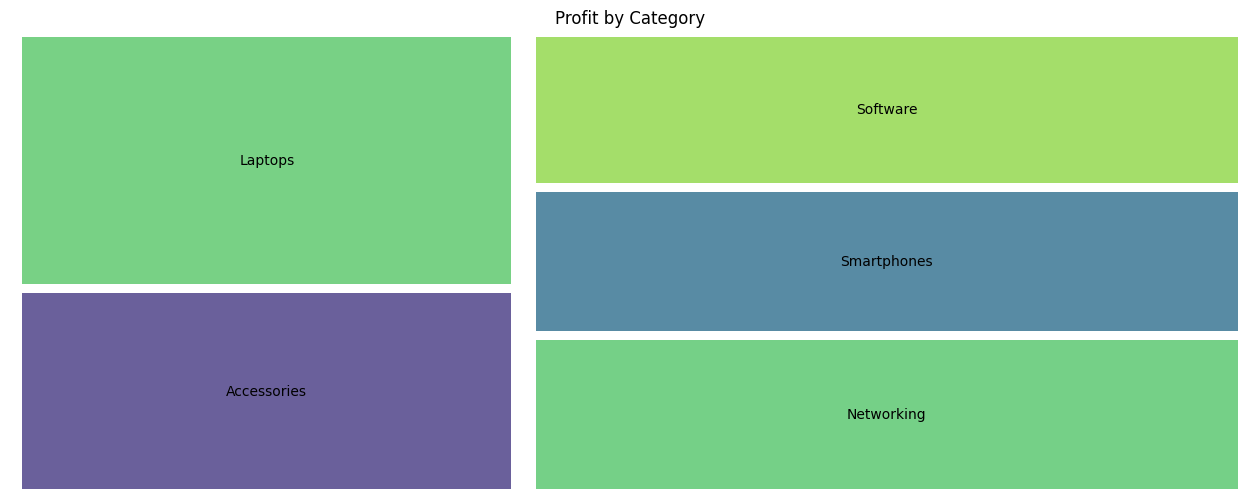

In [94]:
sizes = category_data['Profit'].values
labels = category_data['Category'].values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(16, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, pad=True)

plt.title('Profit by Category')
plt.axis('off')
plt.show()

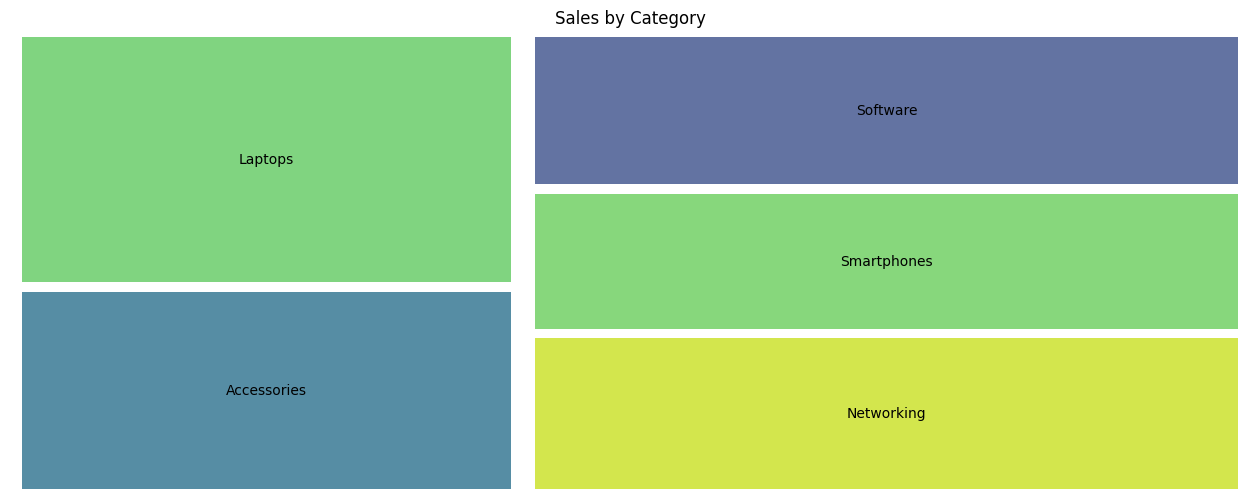

In [95]:
sizes = category_data['Sales'].values
labels = category_data['Category'].values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(16, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, pad=True)

plt.title('Sales by Category')
plt.axis('off')
plt.show()

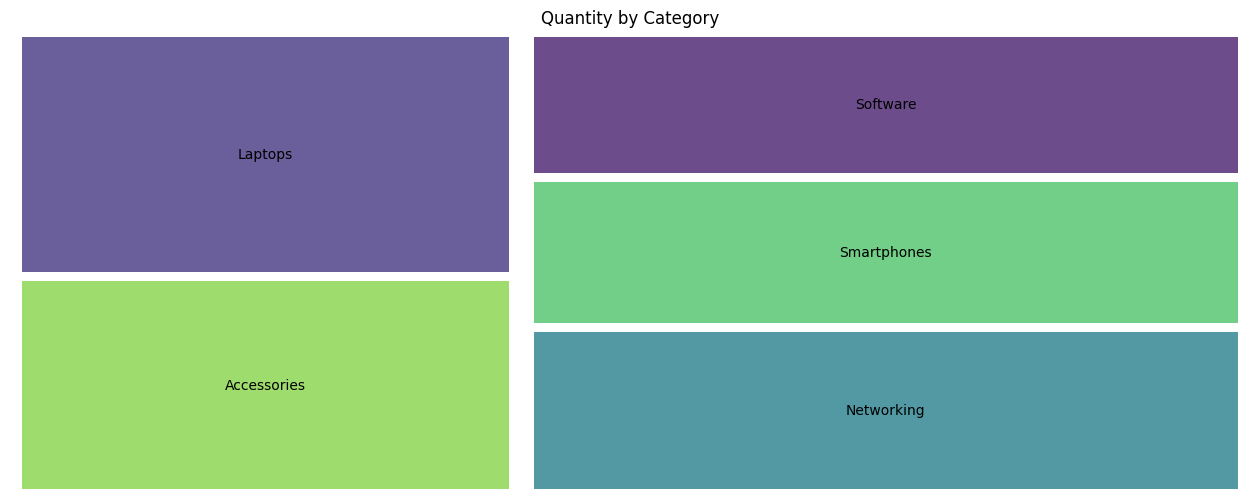

In [96]:
sizes = category_data['Quantity'].values
labels = category_data['Category'].values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(16, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, pad=True)

plt.title('Quantity by Category')
plt.axis('off')
plt.show()

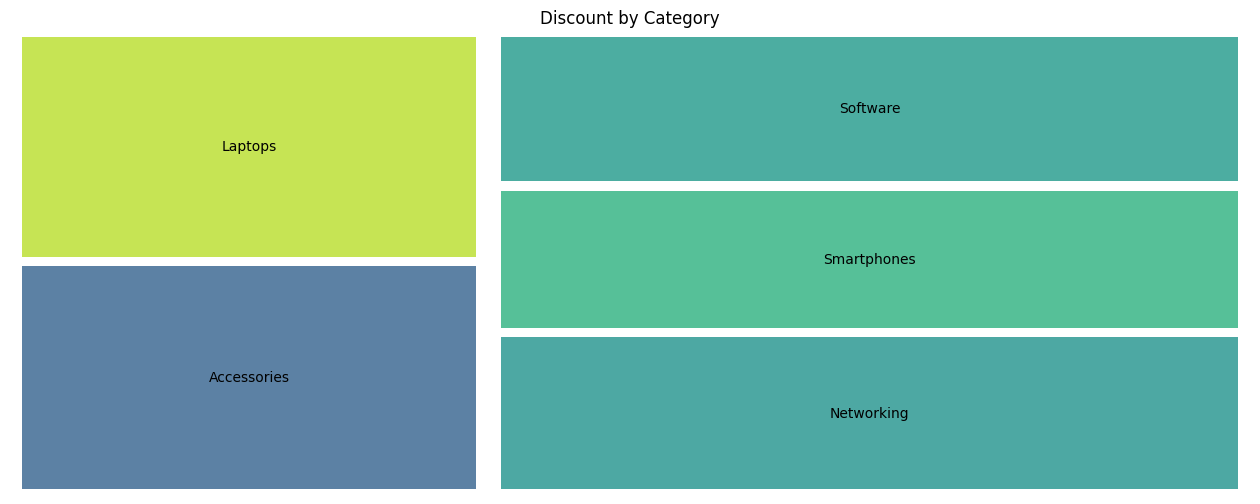

In [98]:
sizes = category_data['Discount'].values
labels = category_data['Category'].values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(16, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, pad=True)

plt.title('Discount by Category')
plt.axis('off')
plt.show()

#### Region Treemaps

In [76]:
region_data

,Region,Sales,Quantity,Profit,Discount
0,Africa,231284.52,774,34622.34,0.138312
1,Asia-Pacific,235229.01,872,33642.66,0.157143
2,Europe,243181.44,839,36848.33,0.149693
3,Middle East,281768.29,866,42134.22,0.152273
4,North America,281543.10,951,43130.74,0.140437
5,South America,218870.98,709,30377.77,0.153691


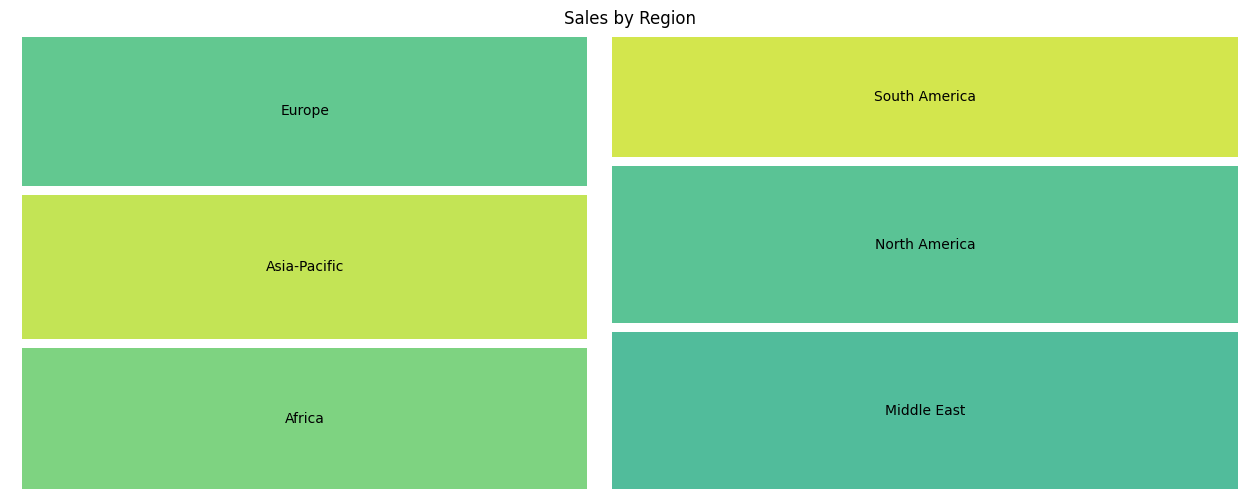

In [91]:
sizes = region_data['Sales'].values
labels = region_data['Region'].values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(16, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, pad=True)

plt.title('Sales by Region')
plt.axis('off')
plt.show()

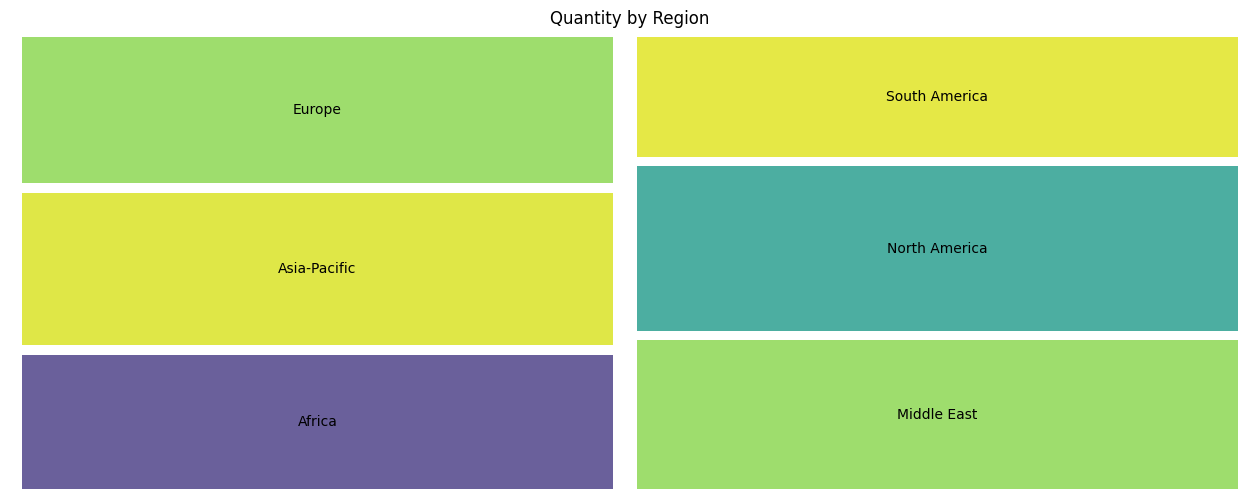

In [90]:
sizes = region_data['Quantity'].values
labels = region_data['Region'].values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(16, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, pad=True)

plt.title('Quantity by Region')
plt.axis('off')
plt.show()

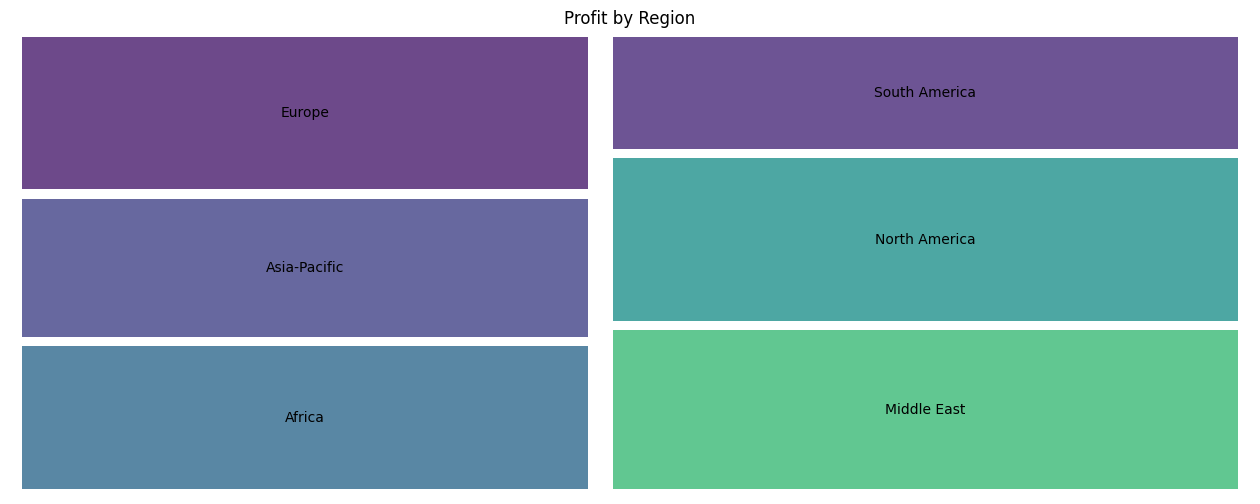

In [88]:
sizes = region_data['Profit'].values
labels = region_data['Region'].values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(16, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, pad=True)

plt.title('Profit by Region')
plt.axis('off')
plt.show()

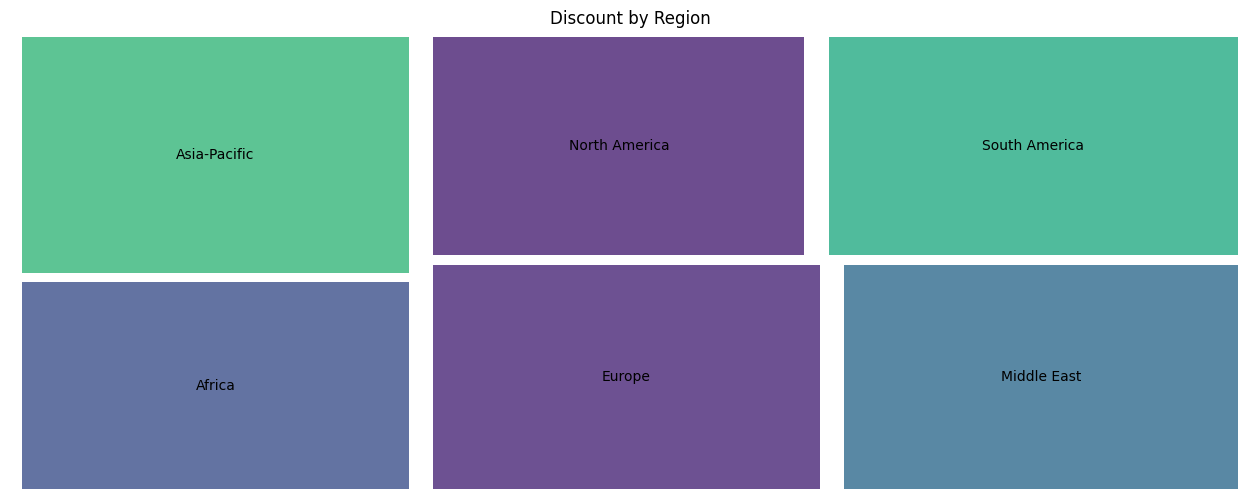

In [89]:
sizes = region_data['Discount'].values
labels = region_data['Region'].values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(16, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, pad=True)

plt.title('Discount by Region')
plt.axis('off')
plt.show()

#### Custumer Segment Treemaps

In [77]:
customer_seg_data

,CustomerSegment,Sales,Quantity,Profit,Discount
0,Consumer,310707.46,1064,47597.13,0.138073
1,Corporate,430833.57,1410,63204.62,0.158214
2,Enterprise,389842.84,1292,56343.62,0.146008
3,Small Business,360493.47,1245,53610.69,0.149791


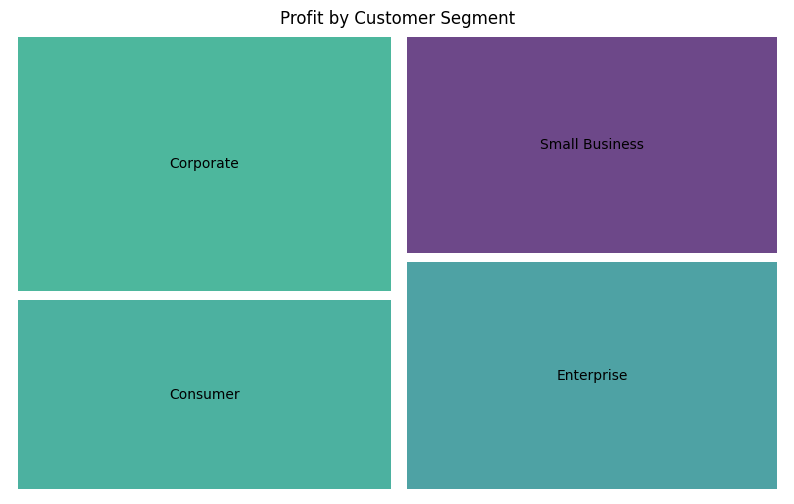

In [81]:
sizes = customer_seg_data['Profit'].values
labels = customer_seg_data['CustomerSegment'].values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, pad=True)

plt.title('Profit by Customer Segment')
plt.axis('off')
plt.show()

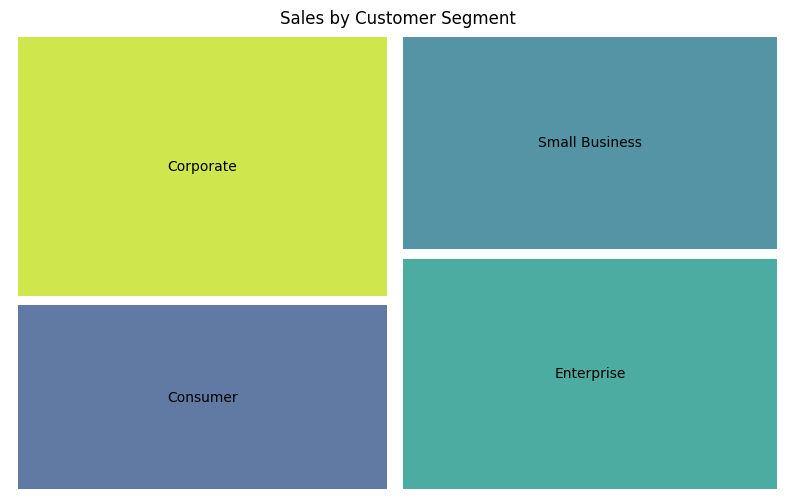

In [80]:
sizes = customer_seg_data['Sales'].values
labels = customer_seg_data['CustomerSegment'].values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, pad=True)

plt.title('Sales by Customer Segment')
plt.axis('off')
plt.show()

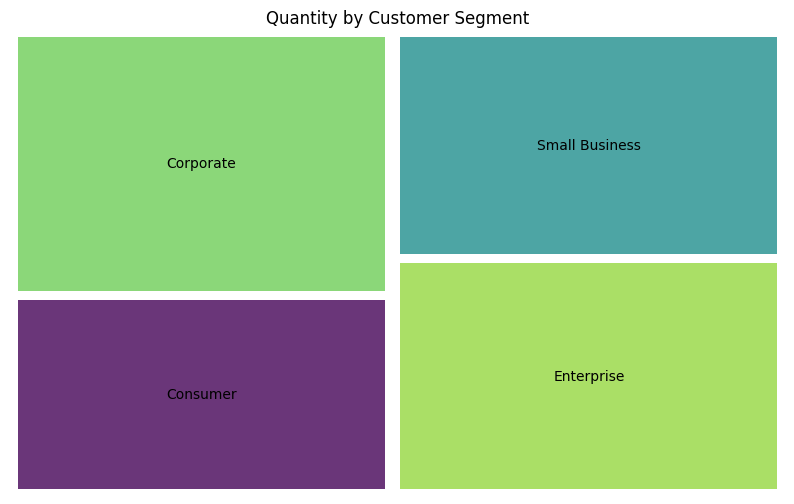

In [82]:
sizes = customer_seg_data['Quantity'].values
labels = customer_seg_data['CustomerSegment'].values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, pad=True)

plt.title('Quantity by Customer Segment')
plt.axis('off')
plt.show()

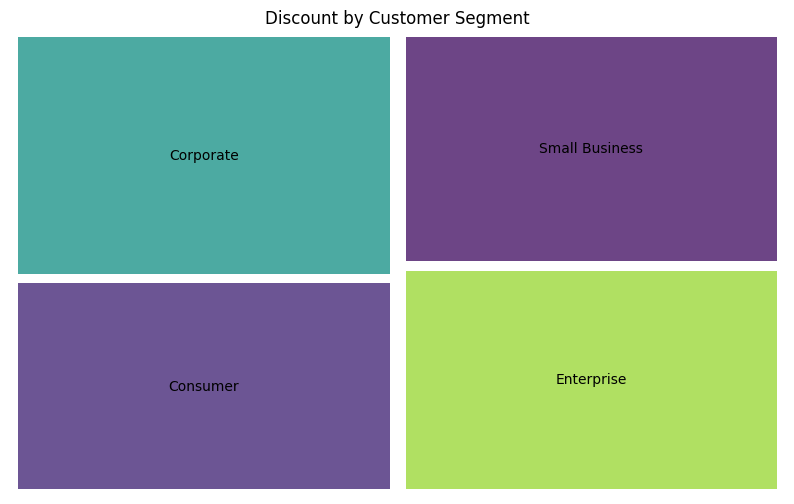

In [83]:
sizes = customer_seg_data['Discount'].values
labels = customer_seg_data['CustomerSegment'].values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, pad=True)

plt.title('Discount by Customer Segment')
plt.axis('off')
plt.show()